In [1]:
# change the cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns', None)

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import matplotlib as mpl
mpl.style.use('bmh')

In [119]:
import scipy.stats as stats
from scipy.stats import zscore
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, binarize, MinMaxScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV, KFold, cross_val_score, GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.metrics import roc_curve,roc_auc_score, accuracy_score, cohen_kappa_score, jaccard_score, confusion_matrix, plot_confusion_matrix, precision_score, recall_score, classification_report
from scipy.stats import shapiro , levene , mannwhitneyu , chi2_contingency , chisquare, f_oneway
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
import xgboost as xgb

from warnings import filterwarnings
filterwarnings('ignore')

# Read the Datasets

In [5]:
df_final_train = pd.read_csv("final_train.csv")
df_final_train.head()

,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Fast Food,Main Course,Beverage,Desert,Place_Bangalore,Place_Delhi,Place_Gurgaon,Place_Hyderabad,Place_Kolkata,Place_Mumbai,Place_Noida,Place_Pune,Delivery_Time_mins
0,200.0,50.0,3.5,12.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,30.0
1,100.0,50.0,3.5,11.0,4.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0
2,150.0,50.0,3.6,99.0,30.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,65.0
3,250.0,99.0,3.7,176.0,95.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,30.0
4,200.0,99.0,3.2,521.0,235.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0


In [6]:
df_final_test = pd.read_csv("final_test.csv")
df_final_test.head()

,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Fast Food,Main Course,Beverage,Desert,Place_Bangalore,Place_Delhi,Place_Gurgaon,Place_Hyderabad,Place_Kolkata,Place_Mumbai,Place_Noida,Place_Pune,Delivery_Time_mins
0,350.0,50.0,4.20000,361.000000,225.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,100.0,50.0,3.57619,202.714286,43.619048,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,100.0,50.0,3.60000,36.000000,16.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
3,200.0,50.0,3.60000,66.000000,33.000000,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,150.0,50.0,2.90000,38.000000,14.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN


# Train Test Split 

In [7]:
# We will work on the df_final_train (train) dataset and predict on the df_final_test (test) dataset

In [8]:
X = df_final_train.drop("Delivery_Time_mins", axis = 1)
y = df_final_train["Delivery_Time_mins"]

In [9]:
df_final_train.columns

Index(['Average_Cost', 'Minimum_Order', 'Rating', 'Votes', 'Reviews',
       'Fast Food', 'Main Course', 'Beverage', 'Desert', 'Place_Bangalore',
       'Place_Delhi', 'Place_Gurgaon', 'Place_Hyderabad', 'Place_Kolkata',
       'Place_Mumbai', 'Place_Noida', 'Place_Pune', 'Delivery_Time_mins'],
      dtype='object')

In [10]:
columns = ['Average_Cost', 'Minimum_Order', 'Rating', 'Votes', 'Reviews']

for i in columns:
    ss = StandardScaler ( )
    X [ i ] = ss.fit_transform ( X [ i ].values.reshape ( -1 , 1 ) )

In [11]:
X.head()

,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Fast Food,Main Course,Beverage,Desert,Place_Bangalore,Place_Delhi,Place_Gurgaon,Place_Hyderabad,Place_Kolkata,Place_Mumbai,Place_Noida,Place_Pune
0,-0.020811,-0.180293,-0.269656,-0.425724,-0.363901,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.791052,-0.180293,-0.269656,-0.427699,-0.363901,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.405932,-0.180293,-0.009184,-0.253896,-0.274006,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.364309,2.461158,0.251287,-0.101819,-0.049269,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.020811,2.461158,-1.051071,0.579569,0.434781,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Average_Cost,11094.0,-3.572648e-17,1.000045,-1.176173,-0.791052,-0.020811,-0.020811,14.228646
Minimum_Order,11094.0,2.658921e-16,1.000045,-2.875652,-0.180293,-0.180293,-0.180293,24.077933
Rating,11094.0,4.167690e-16,1.000045,-3.916260,-0.530128,-0.009184,0.573776,3.376948
Votes,11094.0,-1.095612e-16,1.000045,-0.443500,-0.402024,-0.303272,-0.044260,17.432541
Reviews,11094.0,-6.558862e-17,1.000045,-0.374273,-0.346613,-0.276311,-0.094216,22.109831
Fast Food,11094.0,4.375338e-01,0.496105,0.000000,0.000000,0.000000,1.000000,1.000000
Main Course,11094.0,6.883901e-01,0.463172,0.000000,0.000000,1.000000,1.000000,1.000000
Beverage,11094.0,1.413377e-01,0.348385,0.000000,0.000000,0.000000,0.000000,1.000000
Desert,11094.0,1.883000e-01,0.390969,0.000000,0.000000,0.000000,0.000000,1.000000
Place_Bangalore,11094.0,1.916351e-01,0.393605,0.000000,0.000000,0.000000,0.000000,1.000000


In [13]:
X_train , X_test , y_train , y_test = train_test_split ( X, y, test_size = 0.2, random_state = 0) 

In [14]:
# We use chisquare goodness of fit to check the ascertainity.

# Hyphothesis:
    # Ha: There is a significant variation in two or more categories of Delivery Time in mins.
    # Ho: There is no significant variation in two or more categories of Delivery Time in mins.

In [15]:
chisquare ( [ len ( y ) , len ( y_train ) , len ( y_test ) ] )

Power_divergenceResult(statistic=5768.520010816657, pvalue=0.0)

In [16]:
# Since p-value < 0.05, we reject Ho and conclude that the split is good representation of the population.

In [17]:
demo_array=np.arange(0,10)

print(demo_array <3)

print(demo_array[demo_array <6])

np.max(demo_array)

[ True  True  True False False False False False False False]
[0 1 2 3 4 5]


9

# Evaluate Target Class

In [18]:
# The classes seem to be imbalanced, lets us further prove this
y.value_counts()

30.0     7406
45.0     2665
65.0      923
120.0      62
20.0       20
80.0       14
10.0        4
Name: Delivery_Time_mins, dtype: int64

In [19]:
y.value_counts(normalize=True)*100

30.0     66.756805
45.0     24.021994
65.0      8.319813
120.0     0.558861
20.0      0.180278
80.0      0.126194
10.0      0.036056
Name: Delivery_Time_mins, dtype: float64

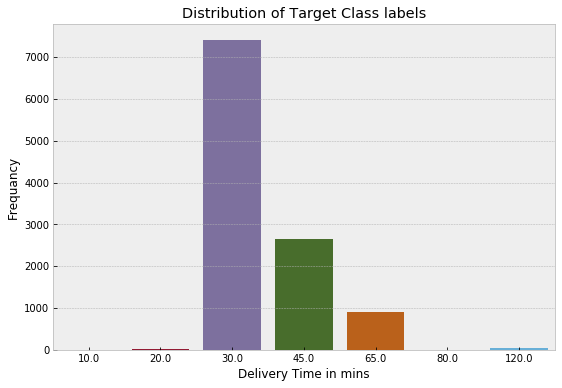

In [20]:
plt.figure(figsize=(9, 6))
sns.countplot(y)
plt.xlabel('Delivery Time in mins')
plt.ylabel("Frequancy")
plt.title("Distribution of Target Class labels")
plt.show()

In [21]:
# We clearly see that the Target labels are imbalanced (<20% of data), so we will have to balance it.

# Handling Class Imbalance

In [22]:
# Let us use SMOT (Over-Sampling) technique to balance the data.
# We will use it only on the train data succh that the predicted data is more generalized than overfit

In [23]:
# we get the error "Expected n_neighbors <= n_samples,  but n_samples = 3, n_neighbors = 6"
# Let us use 

In [24]:
y_train.value_counts()

30.0     5938
45.0     2111
65.0      747
120.0      48
20.0       16
80.0       11
10.0        4
Name: Delivery_Time_mins, dtype: int64

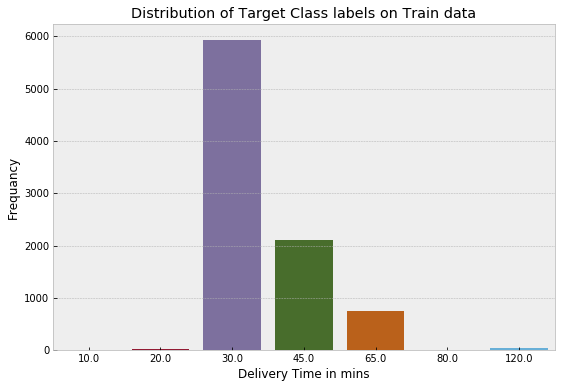

In [25]:
plt.figure(figsize=(9, 6))
sns.countplot(y_train)
plt.xlabel('Delivery Time in mins')
plt.ylabel("Frequancy")
plt.title("Distribution of Target Class labels on Train data")
plt.show()

## Synthetic Minority Oversampling Technique (SMOTE)

In [26]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=0, k_neighbors=3)
X_train_SMOTE, y_train_SMOTE = smt.fit_sample(X_train, y_train)

In [27]:
# Our SMOT result gave an error "ValueError: Expected n_neighbors <= n_samples,  but n_samples = 3, n_neighbors = 6"
# we have the option to remove the minority target labels or use another oversampling technique

# we further used k_neighbors as (2) as n_neighbors=6 > n_samples din't work.

# We can also use Random Over Sampling technique which will not give us the problem, as it does not use N Nearest neighbours for sampling.

In [28]:
y_train_SMOTE.value_counts()

120.0    5938
80.0     5938
20.0     5938
10.0     5938
45.0     5938
65.0     5938
30.0     5938
Name: Delivery_Time_mins, dtype: int64

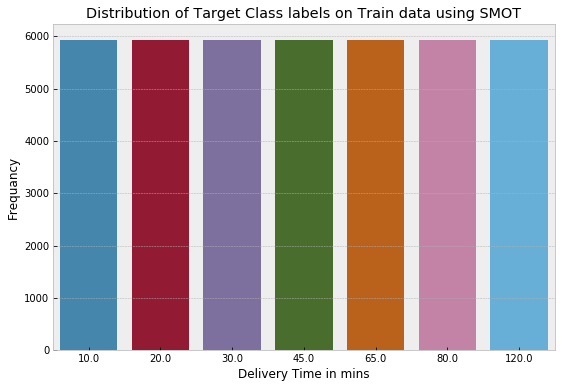

In [29]:
plt.figure(figsize=(9, 6))
sns.countplot(y_train_SMOTE)
plt.xlabel('Delivery Time in mins')
plt.ylabel("Frequancy")
plt.title("Distribution of Target Class labels on Train data using SMOT")
plt.show()

## Random OverSampler

In [30]:
from imblearn.over_sampling import (RandomOverSampler, SMOTE, ADASYN)

In [31]:
ROS = RandomOverSampler(random_state=0)
X_train_ROS, y_train_ROS = ROS.fit_sample(X_train, y_train)

In [32]:
y_train_ROS.value_counts()

120.0    5938
80.0     5938
20.0     5938
10.0     5938
45.0     5938
65.0     5938
30.0     5938
Name: Delivery_Time_mins, dtype: int64

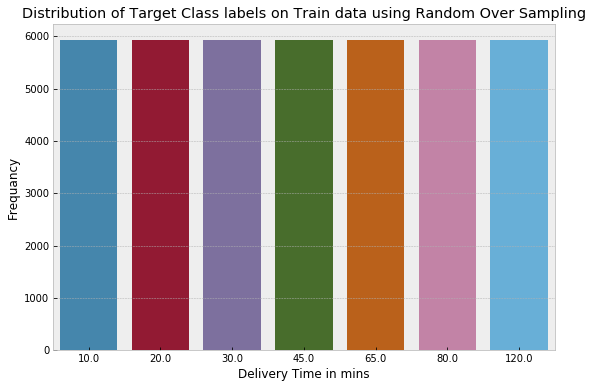

In [33]:
plt.figure(figsize=(9, 6))
sns.countplot(y_train_ROS)
plt.xlabel('Delivery Time in mins')
plt.ylabel("Frequancy")
plt.title("Distribution of Target Class labels on Train data using Random Over Sampling")
plt.show()

## Adaptive Synthetic Sampling (ADASYN)

In [34]:
# Our ADASYN result gave an error "ValueError: Expected n_neighbors <= n_samples,  but n_samples = 3, n_neighbors = 6"
# we have the option to remove the minority target labels or use another oversampling technique

# we further used k_neighbors as (2) as n_neighbors=6 > n_samples din't work.

# We can also use Random Over Sampling technique which will not give us the problem, as it does not use N Nearest neighbours for sampling.

In [35]:
adasyn = ADASYN(random_state=0, n_neighbors=2)
X_train_adasyn, y_train_adasyn = adasyn.fit_sample(X_train, y_train)

In [36]:
y_train_adasyn.value_counts()

45.0     6459
20.0     5940
80.0     5939
10.0     5939
120.0    5938
30.0     5938
65.0     5802
Name: Delivery_Time_mins, dtype: int64

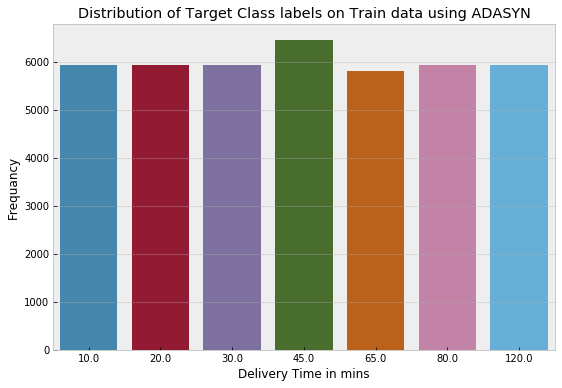

In [37]:
plt.figure(figsize=(9, 6))
sns.countplot(y_train_adasyn)
plt.xlabel('Delivery Time in mins')
plt.ylabel("Frequancy")
plt.title("Distribution of Target Class labels on Train data using ADASYN")
plt.show()

# Fit the Base Model

In [ ]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
models = []
models.append(('Decision Tree Classifier',dt))
models.append(('Random Forest Classifier',rf))
models.append(('KNeighbors Classifier',knn))

In [ ]:
results = []
names = []
for name, model in models:
    kfold = KFold(shuffle=True, n_splits=3, random_state=0)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='f1_weighted')
    results.append(cv_results)
    names.append(name)
    print('%s : %f(%f)' %(name,np.mean(cv_results), np.var(cv_results,ddof=1)))

# boxplot algorithm comparision
fig = plt.figure()
fig.suptitle('Algorithm Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation="45")
plt.show()

In [ ]:
# We see that the Decision Tree Classifier gives a better balance of variance and vias error
# So we can select it as our base model

# User-Defined Functions 

## Train Test Split


In [38]:
# train test split
def perform_train_test_split(x,y,size):
    return train_test_split(x, y, test_size = size, random_state = 0)

## Scaling

### Standard Scalar

In [39]:
# function for scaling the data for train test split
def std_data(xtrain,xtest):
    sc = StandardScaler()
    scaled = sc.fit(xtrain)
    scaled_train = sc.transform(xtrain)
    scaled_test = sc.transform(xtest)
    return scaled_train, scaled_test

In [40]:
# function to scale whole data
def std_all_data(x):
    sc = StandardScaler()
    scaled = sc.fit_transform(x)
    return scaled

### Min-Max Scalar

In [41]:
# function for scaling the data for train test split
def min_max_data(xtrain,xtest):
    mm = MinMaxScaler()
    scaled = mm.fit(xtrain)
    scaled_train = mm.transform(xtrain)
    scaled_test = mm.transform(xtest)
    return scaled_train, scaled_test

In [42]:
# function to scale whole data
def min_max_all_data(x):
    mm = MinMaxScaler()
    scaled = mm.fit_transform(x)
    return scaled

## Finding Optimal Parameters

### Randomized Search CV

In [43]:
# function for applying random search cv
def random_search_cv(X_train_SMOTE,y_train_SMOTE,model,params):
    global RS_best_est, RS_best_params, cv_results_rs
    sk = StratifiedKFold(n_splits=3, random_state=0, shuffle=True)
    RS = RandomizedSearchCV(model, params, random_state = 0, n_iter = 100, scoring='f1_weighted', cv = sk, verbose=2, n_jobs=-1, return_train_score=True)
    RS.fit(X_train_SMOTE,y_train_SMOTE)
    print("\n\nBest Parameters:\n", RS.best_params_) 
    print("\n\nBest Estimator:\n", RS.best_estimator_)
    print("\n\nBest Score:\n", RS.best_score_)
    print("\n\nBest Index:\n", RS.best_index_)
    print("\n\nScorer:\n", RS.scorer_)
    # Best Estimator
    RS_best_est = RS.best_estimator_
    RS_best_params = RS.best_params_
    # cv results
    cv_results_rs = pd.DataFrame(RS.cv_results_)
    return RS_best_est, RS_best_params 

### GridSearch CV

In [148]:
# function for applying grid search cv
def grid_search_cv(X_train_SMOTE, y_train_SMOTE, model, params):
    global GS_best_est, GS_best_params, cv_results_gs
    sk = StratifiedKFold(n_splits=3, random_state=0, shuffle=True)
    GS = GridSearchCV(estimator = model, param_grid = params, scoring='f1_weighted', cv = sk, verbose=2, n_jobs=-1, return_train_score=True)
    GS.fit(X_train_SMOTE, y_train_SMOTE)
    print("\n\nBest Parameters:\n", GS.best_params_) 
    print("\n\nBest Estimator:\n", GS.best_estimator_)
    print("\n\nBest Score:\n", GS.best_score_)
    print("\n\nBest Index:\n", GS.best_index_)
    print("\n\nScorer:\n", GS.scorer_)
    # Best Estimator
    GS_best_est = GS.best_estimator_
    GS_best_params = GS.best_params_
    # cv results
    cv_results_gs = pd.DataFrame(GS.cv_results_)
    return GS_best_est, GS_best_params 

## Get Scores from models

### Fit, Predict and Plotting Scores 

In [45]:
# function to  for train and test  
def fit_predict_plot(X_train,X_test,y_train,y_test,model):
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    print('Train Data: Accuracy Score\n')
    print(accuracy_score(y_train,y_pred_train))
    print('\n\nTrain Data: Classification Report\n')
    print(classification_report(y_train,y_pred_train))
    print('\n\nTrain Data: Kappa Cohen Score\n')
    print(cohen_kappa_score(y_train,y_pred_train))
    print('\n\nTrain Data: Confusion Matrix\n')
    print(confusion_matrix(y_train,y_pred_train))
    cf_matrix = confusion_matrix(y_train,y_pred_train)
    print('\n\nTrain Data: Normalized Confusion Matrix\n')
    fig, ax = plt.subplots(figsize=(9, 8))
    plot_confusion_matrix(model,X_train,y_train, ax=ax, normalize="all")
    plt.show()
    #print(jaccard_score(y_train,y_pred_train))
    
    print('Test Data: Accuracy Score\n')
    print(accuracy_score(y_test,y_pred_test))
    print('\n\nTest Data: Classification Report\n')
    print(classification_report(y_test,y_pred_test))
    print('\n\nTest Data: Kappa Cohen Score\n')
    print(cohen_kappa_score(y_test,y_pred_test))
    print('\n\nTest Data: Confusion Matrix\n')
    print(confusion_matrix(y_test,y_pred_test))
    print('\n\nTest Data: Normalized Confusion Matrix\n')
    fig, ax = plt.subplots(figsize=(9, 8))
    plot_confusion_matrix(model,X_test,y_test, ax=ax, normalize="all")
    plt.show()
    #print(jaccard_score(y_test,y_pred_test))


### Predict CV Scores

In [46]:
# function to  for train and test  
def predict_cv(X_train,X_test,y_train,y_test,model):
    sk = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    y_pred_train = cross_val_predict(model, X_train, y_train, cv=sk)
    y_pred_test = cross_val_predict(model, X_test, y_test, cv=sk)
    
    print('Train Data: Accuracy Score\n')
    print(accuracy_score(y_train,y_pred_train))
    print('\n\nTrain Data: Classification Report\n')
    print(classification_report(y_train,y_pred_train))
    print('\n\nTrain Data: Kappa Cohen Score\n')
    print(cohen_kappa_score(y_train,y_pred_train))
    print('\n\nTrain Data: Confusion Matrix\n')
    print(confusion_matrix(y_train,y_pred_train))
    cf_matrix = confusion_matrix(y_train,y_pred_train)
    print('\n\nTrain Data: Normalized Confusion Matrix\n')
    fig, ax = plt.subplots(figsize=(9, 8))
    plot_confusion_matrix(model,X_train,y_train, ax=ax, normalize="all")
    plt.show()
    #print(jaccard_score(y_train,y_pred_train))
    
    print('Test Data: Accuracy Score\n')
    print(accuracy_score(y_test,y_pred_test))
    print('\n\nTest Data: Classification Report\n')
    print(classification_report(y_test,y_pred_test))
    print('\n\nTest Data: Kappa Cohen Score\n')
    print(cohen_kappa_score(y_test,y_pred_test))
    print('\n\nTest Data: Confusion Matrix\n')
    print(confusion_matrix(y_test,y_pred_test))
    print('\n\nTest Data: Normalized Confusion Matrix\n')
    fig, ax = plt.subplots(figsize=(9, 8))
    plot_confusion_matrix(model,X_test,y_test, ax=ax, normalize="all")
    plt.show()
    #print(jaccard_score(y_test,y_pred_test))
    return y_pred_train, y_pred_test


# Modelling

## Decision Tree

### Evaluating the best Sampling Technique

#### Modelling Without Sampling

Train Data: Accuracy Score

0.9890704225352113


Train Data: Classification Report

              precision    recall  f1-score   support

        10.0       1.00      0.50      0.67         4
        20.0       1.00      0.88      0.93        16
        30.0       0.99      1.00      0.99      5938
        45.0       1.00      0.97      0.98      2111
        65.0       1.00      0.97      0.99       747
        80.0       1.00      0.91      0.95        11
       120.0       1.00      0.94      0.97        48

    accuracy                           0.99      8875
   macro avg       1.00      0.88      0.93      8875
weighted avg       0.99      0.99      0.99      8875



Train Data: Kappa Cohen Score

0.9774180219438462


Train Data: Confusion Matrix

[[   2    0    2    0    0    0    0]
 [   0   14    2    0    0    0    0]
 [   0    0 5933    4    1    0    0]
 [   0    0   63 2047    1    0    0]
 [   0    0   19    1  727    0    0]
 [   0    0    1    0    0   10    0]
 [   0 

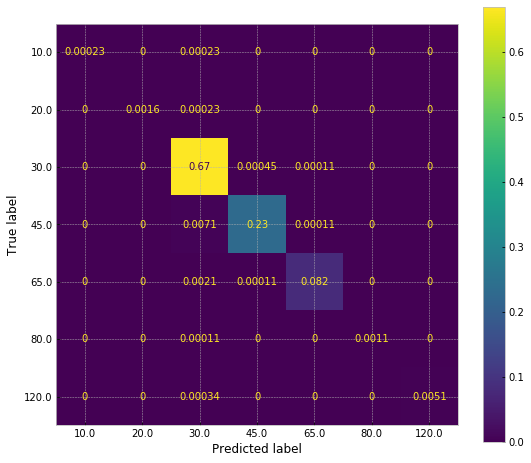

Test Data: Accuracy Score

0.7372690401081569


Test Data: Classification Report

              precision    recall  f1-score   support

        10.0       0.00      0.00      0.00         0
        20.0       0.20      0.25      0.22         4
        30.0       0.85      0.84      0.84      1468
        45.0       0.60      0.56      0.58       554
        65.0       0.39      0.49      0.43       176
        80.0       0.40      0.67      0.50         3
       120.0       0.36      0.36      0.36        14

    accuracy                           0.74      2219
   macro avg       0.40      0.45      0.42      2219
weighted avg       0.74      0.74      0.74      2219



Test Data: Kappa Cohen Score

0.4737102682225517


Test Data: Confusion Matrix

[[   0    0    0    0    0    0    0]
 [   0    1    2    1    0    0    0]
 [   1    3 1234  152   70    1    7]
 [   0    0  178  308   65    2    1]
 [   0    1   42   46   86    0    1]
 [   0    0    0    1    0    2    0]
 [   0    0

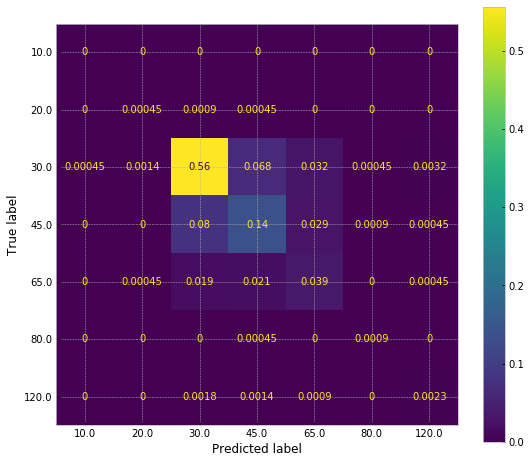

In [47]:
dt = DecisionTreeClassifier()
fit_predict_plot(X_train,X_test,y_train,y_test, dt)

In [48]:
# The model is highly overfit

#### Modelling with SMOTE

Train Data: Accuracy Score

0.9971130250685657


Train Data: Classification Report

              precision    recall  f1-score   support

        10.0       1.00      1.00      1.00      5938
        20.0       1.00      1.00      1.00      5938
        30.0       0.98      1.00      0.99      5938
        45.0       1.00      0.99      0.99      5938
        65.0       1.00      1.00      1.00      5938
        80.0       1.00      1.00      1.00      5938
       120.0       1.00      1.00      1.00      5938

    accuracy                           1.00     41566
   macro avg       1.00      1.00      1.00     41566
weighted avg       1.00      1.00      1.00     41566



Train Data: Kappa Cohen Score

0.9966318625799933


Train Data: Confusion Matrix

[[5936    0    2    0    0    0    0]
 [   0 5936    1    0    1    0    0]
 [   0    0 5927    4    7    0    0]
 [   0    0   81 5855    2    0    0]
 [   0    0   17    1 5920    0    0]
 [   0    0    1    0    0 5937    0]
 [   0 

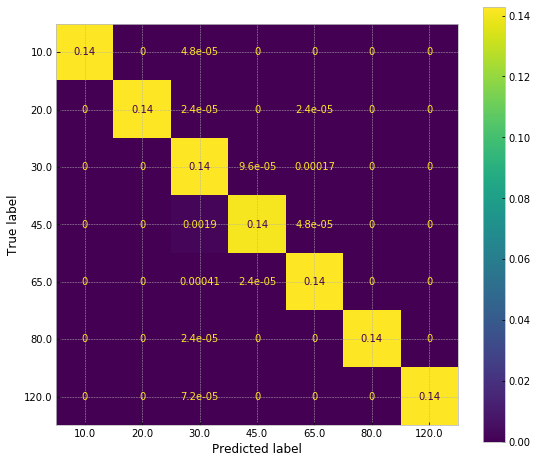

Test Data: Accuracy Score

0.7214961694456963


Test Data: Classification Report

              precision    recall  f1-score   support

        20.0       0.12      0.25      0.17         4
        30.0       0.85      0.81      0.83      1468
        45.0       0.56      0.56      0.56       554
        65.0       0.38      0.51      0.44       176
        80.0       1.00      0.67      0.80         3
       120.0       0.42      0.36      0.38        14

    accuracy                           0.72      2219
   macro avg       0.56      0.53      0.53      2219
weighted avg       0.73      0.72      0.73      2219



Test Data: Kappa Cohen Score

0.4526142427703027


Test Data: Confusion Matrix

[[   1    3    0    0    0    0]
 [   4 1195  189   75    0    5]
 [   2  175  308   69    0    0]
 [   1   36   47   90    0    2]
 [   0    0    1    0    2    0]
 [   0    3    4    2    0    5]]


Test Data: Normalized Confusion Matrix



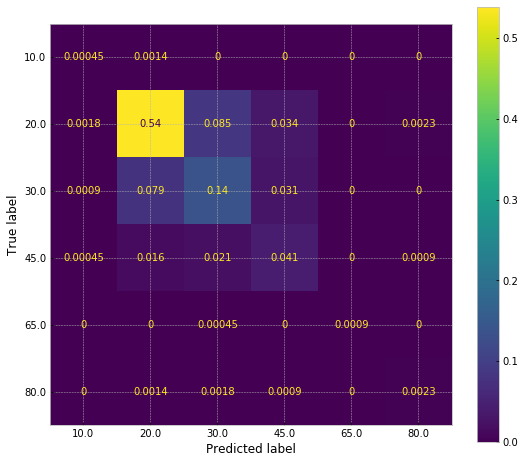

In [49]:
dt_SMOTE = DecisionTreeClassifier()
fit_predict_plot(X_train_SMOTE,X_test,y_train_SMOTE,y_test, dt_SMOTE)

In [50]:
# The model still seems to be highly overfit

#### Modelling with Random Oversampler

Train Data: Accuracy Score

0.9924938651782707


Train Data: Classification Report

              precision    recall  f1-score   support

        10.0       0.99      1.00      1.00      5938
        20.0       1.00      1.00      1.00      5938
        30.0       0.97      0.98      0.98      5938
        45.0       0.99      0.98      0.99      5938
        65.0       1.00      0.99      0.99      5938
        80.0       1.00      1.00      1.00      5938
       120.0       0.99      1.00      1.00      5938

    accuracy                           0.99     41566
   macro avg       0.99      0.99      0.99     41566
weighted avg       0.99      0.99      0.99     41566



Train Data: Kappa Cohen Score

0.9912428427079825


Train Data: Confusion Matrix

[[5938    0    0    0    0    0    0]
 [   0 5938    0    0    0    0    0]
 [  29   10 5818   37   16    2   26]
 [   1    1  101 5828    7    0    0]
 [   0   15   60    0 5856    0    7]
 [   0    0    0    0    0 5938    0]
 [   0 

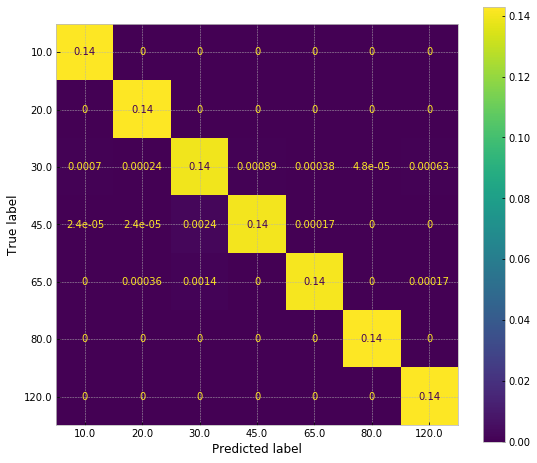

Test Data: Accuracy Score

0.7296079315006759


Test Data: Classification Report

              precision    recall  f1-score   support

        10.0       0.00      0.00      0.00         0
        20.0       0.14      0.25      0.18         4
        30.0       0.84      0.82      0.83      1468
        45.0       0.60      0.58      0.59       554
        65.0       0.41      0.48      0.44       176
        80.0       0.33      0.67      0.44         3
       120.0       0.29      0.29      0.29        14

    accuracy                           0.73      2219
   macro avg       0.37      0.44      0.40      2219
weighted avg       0.74      0.73      0.73      2219



Test Data: Kappa Cohen Score

0.46177551017933127


Test Data: Confusion Matrix

[[   0    0    0    0    0    0    0]
 [   0    1    2    1    0    0    0]
 [   6    5 1207  172   67    2    9]
 [   0    1  176  320   55    2    0]
 [   0    0   54   36   85    0    1]
 [   0    0    0    1    0    2    0]
 [   0    

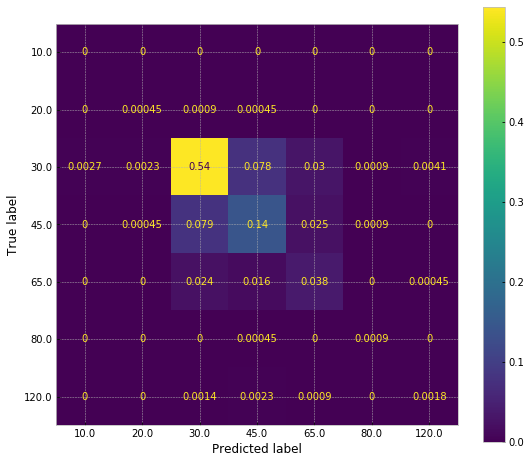

In [51]:
dt_ROS = DecisionTreeClassifier()
fit_predict_plot(X_train_ROS,X_test,y_train_ROS,y_test, dt_ROS)

In [52]:
# The model seems to be faring not that good as SMOTE in representing the target class labels

#### Modelling with ADASYN

Train Data: Accuracy Score

0.9964247407937076


Train Data: Classification Report

              precision    recall  f1-score   support

        10.0       1.00      1.00      1.00      5939
        20.0       1.00      1.00      1.00      5940
        30.0       0.98      1.00      0.99      5938
        45.0       1.00      0.98      0.99      6459
        65.0       1.00      1.00      1.00      5802
        80.0       1.00      1.00      1.00      5939
       120.0       1.00      1.00      1.00      5938

    accuracy                           1.00     41955
   macro avg       1.00      1.00      1.00     41955
weighted avg       1.00      1.00      1.00     41955



Train Data: Kappa Cohen Score

0.995828262525364


Train Data: Confusion Matrix

[[5937    0    2    0    0    0    0]
 [   0 5938    2    0    0    0    0]
 [   0    0 5928    9    1    0    0]
 [   0    0  111 6347    1    0    0]
 [   0    0   19    1 5782    0    0]
 [   0    0    1    0    0 5938    0]
 [   0  

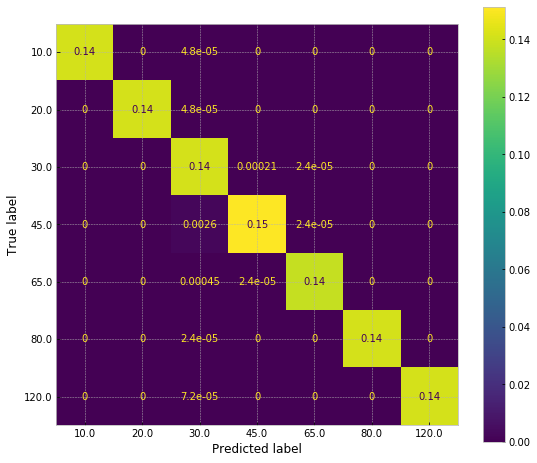

Test Data: Accuracy Score

0.7214961694456963


Test Data: Classification Report

              precision    recall  f1-score   support

        20.0       0.14      0.25      0.18         4
        30.0       0.84      0.81      0.83      1468
        45.0       0.55      0.58      0.57       554
        65.0       0.40      0.48      0.44       176
        80.0       0.40      0.67      0.50         3
       120.0       0.45      0.36      0.40        14

    accuracy                           0.72      2219
   macro avg       0.47      0.52      0.49      2219
weighted avg       0.73      0.72      0.73      2219



Test Data: Kappa Cohen Score

0.451704011598106


Test Data: Confusion Matrix

[[   1    1    2    0    0    0]
 [   3 1188  211   61    0    5]
 [   2  166  321   62    3    0]
 [   1   45   45   84    0    1]
 [   0    1    0    0    2    0]
 [   0    5    2    2    0    5]]


Test Data: Normalized Confusion Matrix



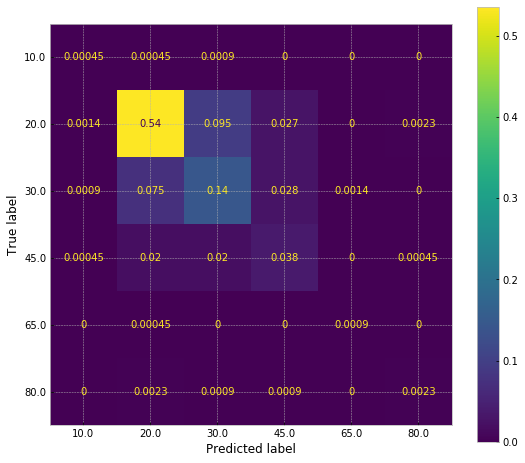

In [53]:
dt_adasyn = DecisionTreeClassifier()
fit_predict_plot(X_train_adasyn,X_test,y_train_adasyn,y_test, dt_adasyn)

In [54]:
# The model seems to be better than Random OverSampler but not as good as SMOT, so we go ahead with SMOT as our sampling technique.

### Hyper Parameter Tuning

In [55]:
from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(dt.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}


In [56]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

criterion = ['entropy','gini']
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2','int','float',None]

# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
max_depth = range(1,50)

# Minimum number of samples required to split a node
# min_samples_split = [5, 10, 15, 20]
#min_samples_split = [4, 8, 12, 16, 20, 24, 28]
min_samples_split = range(7,30)


# Minimum number of samples required at each leaf node
min_samples_leaf = range(1,50)



# Create the random grid
random_grid = {'criterion':criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }

pprint(random_grid)

{'criterion': ['entropy', 'gini'],
 'max_depth': range(1, 50),
 'max_features': ['auto', 'sqrt', 'log2', 'int', 'float', None],
 'min_samples_leaf': range(1, 50),
 'min_samples_split': range(7, 30)}


#### Randomized Search CV

In [57]:
random_search_cv(X_train_SMOTE,y_train_SMOTE, dt, random_grid)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 220 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    7.2s finished




Best Parameters:
 {'min_samples_split': 19, 'min_samples_leaf': 12, 'max_features': None, 'max_depth': 48, 'criterion': 'entropy'}


Best Estimator:
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=48, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=19,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


Best Score:
 0.8584299349857245


Best Index:
 99


Scorer:
 make_scorer(f1_score, pos_label=None, average=weighted)


(DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_depth=48, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=12, min_samples_split=19,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 {'min_samples_split': 19,
  'min_samples_leaf': 12,
  'max_features': None,
  'max_depth': 48,
  'criterion': 'entropy'})

In [58]:
cv_restuls_rs_dt = cv_results_rs
cv_restuls_rs_dt.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.145355,0.011205,0.014296,0.002617,25,13,sqrt,46,entropy,"{'min_samples_split': 25, 'min_samples_leaf': ...",0.824244,0.806243,0.817949,0.816145,0.007459,18,0.848882,0.833787,0.844300,0.842323,0.006319
1,0.097074,0.022631,0.013964,0.000813,9,36,log2,16,gini,"{'min_samples_split': 9, 'min_samples_leaf': 3...",0.761389,0.776958,0.760953,0.766433,0.007444,51,0.775303,0.789987,0.772346,0.779212,0.007714
2,0.140955,0.020444,0.014298,0.002050,15,33,log2,18,entropy,"{'min_samples_split': 15, 'min_samples_leaf': ...",0.786915,0.780284,0.785610,0.784270,0.002868,41,0.802518,0.796997,0.802773,0.800763,0.002665
3,0.019615,0.000470,0.000000,0.000000,16,8,int,23,entropy,"{'min_samples_split': 16, 'min_samples_leaf': ...",NaN,NaN,NaN,NaN,NaN,100,NaN,NaN,NaN,NaN,NaN
4,0.046873,0.002155,0.011635,0.000471,24,12,sqrt,5,gini,"{'min_samples_split': 24, 'min_samples_leaf': ...",0.596914,0.580125,0.611529,0.596189,0.012831,62,0.595018,0.586685,0.604475,0.595392,0.007267


In [59]:
RS_best_est_dt = RS_best_est
RS_best_est_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=48, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=19,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [60]:
RS_best_params

{'min_samples_split': 19,
 'min_samples_leaf': 12,
 'max_features': None,
 'max_depth': 48,
 'criterion': 'entropy'}

Train Data: Accuracy Score

0.9107443583698215


Train Data: Classification Report

              precision    recall  f1-score   support

        10.0       1.00      1.00      1.00      5938
        20.0       0.99      1.00      0.99      5938
        30.0       0.80      0.78      0.79      5938
        45.0       0.78      0.76      0.77      5938
        65.0       0.83      0.85      0.84      5938
        80.0       1.00      1.00      1.00      5938
       120.0       0.99      0.99      0.99      5938

    accuracy                           0.91     41566
   macro avg       0.91      0.91      0.91     41566
weighted avg       0.91      0.91      0.91     41566



Train Data: Kappa Cohen Score

0.8958684180981251


Train Data: Confusion Matrix

[[5933    0    5    0    0    0    0]
 [   0 5921    4    3   10    0    0]
 [   0   37 4627  778  477    1   18]
 [   3   25  801 4521  553    8   27]
 [   3   20  343  515 5027    7   23]
 [   0    0    2    1    4 5931    0]
 [   0 

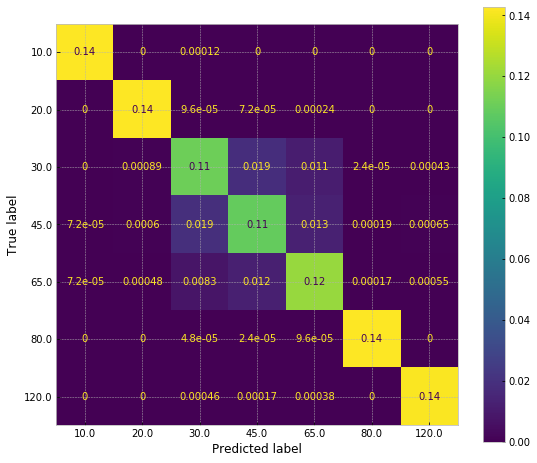

Test Data: Accuracy Score

0.6219017575484452


Test Data: Classification Report

              precision    recall  f1-score   support

        10.0       0.00      0.00      0.00         0
        20.0       0.05      0.25      0.09         4
        30.0       0.83      0.70      0.76      1468
        45.0       0.44      0.49      0.46       554
        65.0       0.24      0.44      0.31       176
        80.0       0.00      0.00      0.00         3
       120.0       0.16      0.29      0.21        14

    accuracy                           0.62      2219
   macro avg       0.25      0.31      0.26      2219
weighted avg       0.68      0.62      0.64      2219



Test Data: Kappa Cohen Score

0.31106388458603684


Test Data: Confusion Matrix

[[   0    0    0    0    0    0    0]
 [   0    1    3    0    0    0    0]
 [   0   12 1029  274  139    1   13]
 [   0    4  176  269   99    0    6]
 [   1    2   34   60   77    0    2]
 [   0    0    1    0    2    0    0]
 [   0    

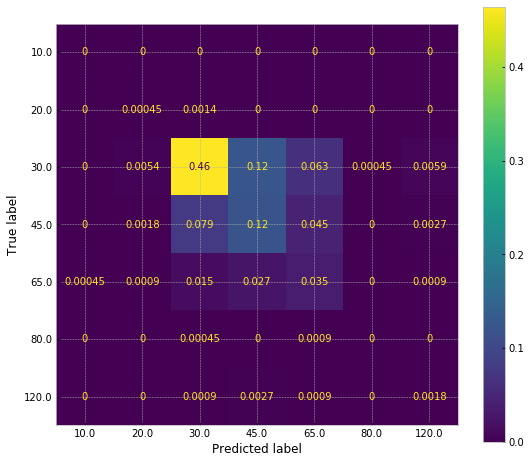

In [61]:
fit_predict_plot(X_train_SMOTE,X_test,y_train_SMOTE,y_test, RS_best_est_dt)

#### Grid Search CV

In [62]:
# Create the parameter grid based on the results of random search 

criterion = ['entropy',]
max_features = [None]
max_depth = range(20,50,5)
min_samples_split = range(7,21,1)
min_samples_leaf = range(1,20,1)

                    

param_grid = {'criterion':criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

pprint(param_grid)

{'criterion': ['entropy'],
 'max_depth': range(20, 50, 5),
 'max_features': [None],
 'min_samples_leaf': range(1, 20),
 'min_samples_split': range(7, 21)}


In [63]:
grid_search_cv(X_train_SMOTE,y_train_SMOTE, dt, params=param_grid)

Fitting 3 folds for each of 1596 candidates, totalling 4788 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 4788 out of 4788 | elapsed: 11.6min finished




Best Parameters:
 {'criterion': 'entropy', 'max_depth': 25, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 7}


Best Estimator:
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=25, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


Best Score:
 0.8997260674070945


Best Index:
 266


Scorer:
 make_scorer(f1_score, pos_label=None, average=weighted)


(DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_depth=25, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=7,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 {'criterion': 'entropy',
  'max_depth': 25,
  'max_features': None,
  'min_samples_leaf': 1,
  'min_samples_split': 7})

In [64]:
cv_restuls_gs_dt = cv_results_gs
cv_restuls_gs_dt.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.580837,0.051064,0.011980,0.000815,entropy,20,None,1,7,"{'criterion': 'entropy', 'max_depth': 20, 'max...",0.895242,0.896119,0.898226,0.896529,0.001252,16,0.966906,0.967464,0.969918,0.968096,0.001308
1,0.545484,0.053907,0.012968,0.000001,entropy,20,None,1,8,"{'criterion': 'entropy', 'max_depth': 20, 'max...",0.893649,0.894868,0.898379,0.895632,0.002005,20,0.963429,0.964364,0.965793,0.964528,0.000972
2,0.537243,0.051137,0.013305,0.001866,entropy,20,None,1,9,"{'criterion': 'entropy', 'max_depth': 20, 'max...",0.892815,0.892750,0.895282,0.893616,0.001179,37,0.960521,0.960648,0.962293,0.961154,0.000807
3,0.504117,0.026378,0.012633,0.000470,entropy,20,None,1,10,"{'criterion': 'entropy', 'max_depth': 20, 'max...",0.890159,0.892063,0.893842,0.892021,0.001504,47,0.957186,0.955740,0.958940,0.957289,0.001308
4,0.542348,0.023511,0.009365,0.002468,entropy,20,None,1,11,"{'criterion': 'entropy', 'max_depth': 20, 'max...",0.890379,0.889128,0.891806,0.890438,0.001094,70,0.954270,0.952268,0.955619,0.954053,0.001377


In [65]:
GS_best_est_dt = GS_best_est
GS_best_est_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=25, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [66]:
GS_best_params

{'criterion': 'entropy',
 'max_depth': 25,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 7}

#### Running the model with best parameters from GS CV

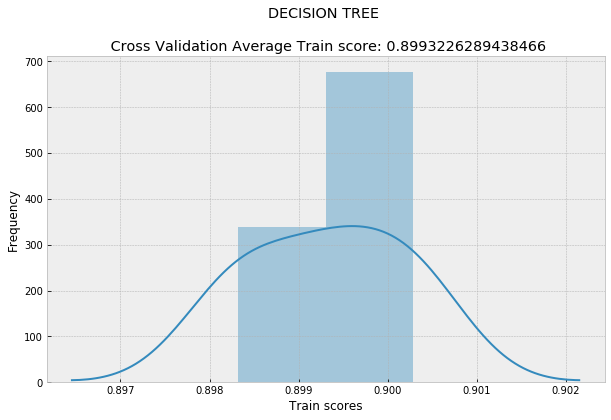

In [67]:
sk = StratifiedKFold(n_splits=3, random_state=0, shuffle=True)
cv_results = cross_val_score(GS_best_est_dt, X_train_SMOTE, y_train_SMOTE, cv=sk, scoring='f1_weighted')
plt.figure(figsize=(10,6))
sns.distplot(cv_results)
plt.xlabel('Train scores')
plt.ylabel('Frequency')
plt.title('DECISION TREE \n\n Cross Validation Average Train score: {}'.format(np.mean(cv_results)))
plt.show()

#### Making Predictions using cross validation

Train Data: Accuracy Score

0.9073040465765289


Train Data: Classification Report

              precision    recall  f1-score   support

        10.0       1.00      1.00      1.00      5938
        20.0       0.99      0.99      0.99      5938
        30.0       0.76      0.79      0.78      5938
        45.0       0.76      0.74      0.75      5938
        65.0       0.85      0.83      0.84      5938
        80.0       1.00      1.00      1.00      5938
       120.0       0.99      1.00      0.99      5938

    accuracy                           0.91     41566
   macro avg       0.91      0.91      0.91     41566
weighted avg       0.91      0.91      0.91     41566



Train Data: Kappa Cohen Score

0.8918547210059504


Train Data: Confusion Matrix

[[5934    0    3    1    0    0    0]
 [   0 5908   20    3    7    0    0]
 [   0   17 4702  838  360    1   20]
 [   4   13 1006 4385  510    5   15]
 [   0    9  442  525 4941    2   19]
 [   0    0    3    3    0 5932    0]
 [   0 

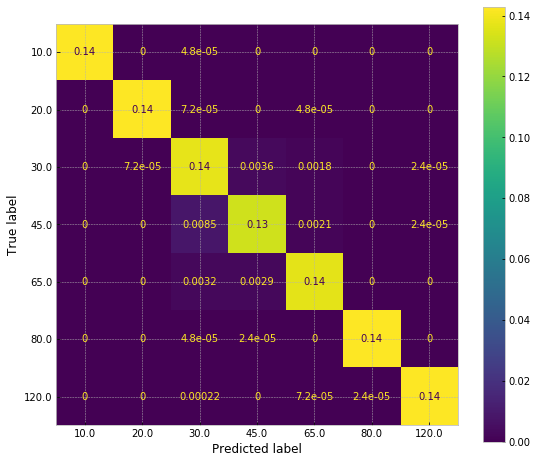

Test Data: Accuracy Score

0.6579540333483551


Test Data: Classification Report

              precision    recall  f1-score   support

        20.0       0.00      0.00      0.00         4
        30.0       0.78      0.81      0.79      1468
        45.0       0.44      0.43      0.43       554
        65.0       0.27      0.20      0.23       176
        80.0       0.00      0.00      0.00         3
       120.0       0.18      0.14      0.16        14

    accuracy                           0.66      2219
   macro avg       0.28      0.26      0.27      2219
weighted avg       0.65      0.66      0.65      2219



Test Data: Kappa Cohen Score

0.2858262317562933


Test Data: Confusion Matrix

[[   0    3    1    0    0    0]
 [   6 1185  229   46    0    2]
 [   1  263  237   49    0    4]
 [   1   69   67   36    0    3]
 [   0    2    1    0    0    0]
 [   0    6    5    1    0    2]]


Test Data: Normalized Confusion Matrix



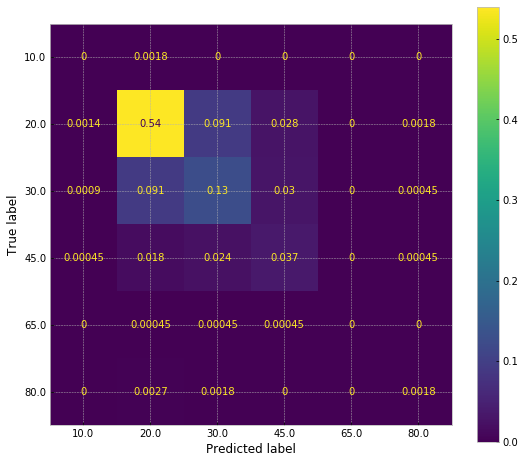

In [68]:
y_dt_pred_train, y_dt_pred_test = predict_cv(X_train_SMOTE, X_test, y_train_SMOTE, y_test, GS_best_est_dt)

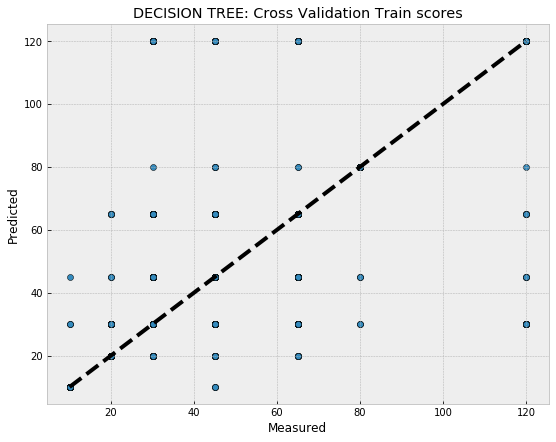

In [69]:
# Decision Tree Cross Validation Train scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_train_SMOTE, y_dt_pred_train, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('DECISION TREE: Cross Validation Train scores')
plt.show()

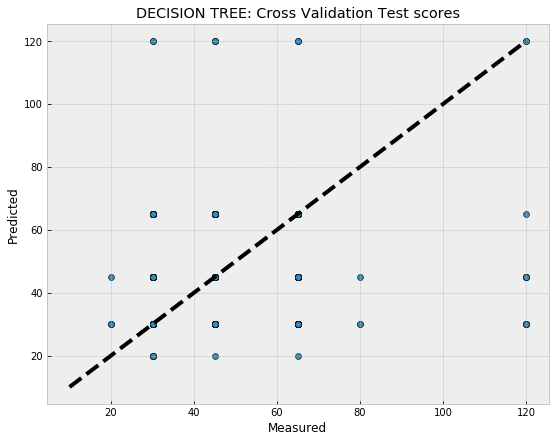

In [70]:
# Decision Tree Cross Validation Test scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_test, y_dt_pred_test, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('DECISION TREE: Cross Validation Test scores')
plt.show()

## Random Forest 

Train Data: Accuracy Score

0.9971130250685657


Train Data: Classification Report

              precision    recall  f1-score   support

        10.0       1.00      1.00      1.00      5938
        20.0       1.00      1.00      1.00      5938
        30.0       0.98      1.00      0.99      5938
        45.0       1.00      0.99      0.99      5938
        65.0       1.00      1.00      1.00      5938
        80.0       1.00      1.00      1.00      5938
       120.0       1.00      1.00      1.00      5938

    accuracy                           1.00     41566
   macro avg       1.00      1.00      1.00     41566
weighted avg       1.00      1.00      1.00     41566



Train Data: Kappa Cohen Score

0.9966318625799933


Train Data: Confusion Matrix

[[5936    0    2    0    0    0    0]
 [   0 5936    1    0    1    0    0]
 [   0    0 5916   14    7    0    1]
 [   0    0   71 5864    3    0    0]
 [   0    0   17    0 5921    0    0]
 [   0    0    1    0    0 5937    0]
 [   0 

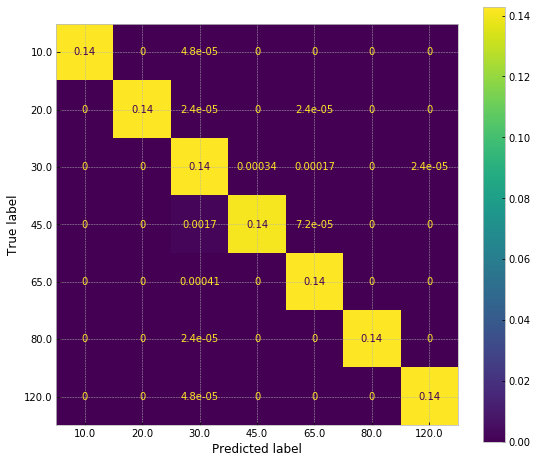

Test Data: Accuracy Score

0.7656602073005858


Test Data: Classification Report

              precision    recall  f1-score   support

        20.0       0.17      0.25      0.20         4
        30.0       0.86      0.86      0.86      1468
        45.0       0.61      0.60      0.60       554
        65.0       0.49      0.52      0.50       176
        80.0       1.00      0.67      0.80         3
       120.0       0.67      0.43      0.52        14

    accuracy                           0.77      2219
   macro avg       0.63      0.55      0.58      2219
weighted avg       0.77      0.77      0.77      2219



Test Data: Kappa Cohen Score

0.523841946954438


Test Data: Confusion Matrix

[[   1    1    2    0    0    0]
 [   2 1269  152   42    0    3]
 [   2  170  330   52    0    0]
 [   1   34   50   91    0    0]
 [   0    0    0    1    2    0]
 [   0    4    4    0    0    6]]


Test Data: Normalized Confusion Matrix



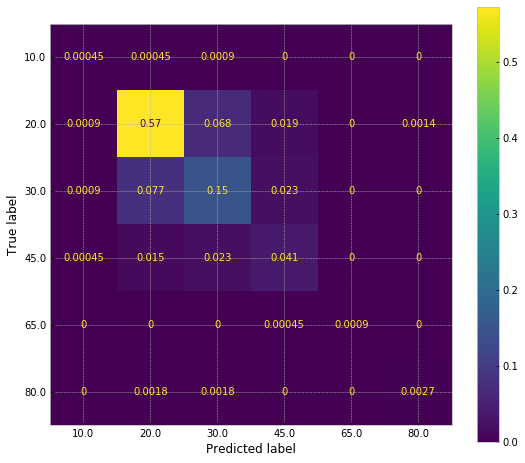

In [71]:
rf = RandomForestClassifier()
fit_predict_plot(X_train_SMOTE,X_test,y_train_SMOTE,y_test, rf)

In [72]:
# We notice that our Random Forest base model seems to be performing better than the Decision Tree (Grid Search CV)

### Hyper Parameter Tuning

In [73]:
rf = RandomForestClassifier(random_state=0)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [74]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
n_estimators = range(1,60)

# splitting criterion
criterion = ['entropy','gini']

# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2','int','float',None]

# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
max_depth = range(1,50, 10)

# Minimum number of samples required to split a node
min_samples_split = range(7,50, 7)

# Minimum number of samples required at each leaf node
min_samples_leaf = range(1,50, 10)

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'criterion':criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
              }

pprint(random_grid)

{'bootstrap': [True, False],
 'criterion': ['entropy', 'gini'],
 'max_depth': range(1, 50, 10),
 'max_features': ['auto', 'sqrt', 'log2', 'int', 'float', None],
 'min_samples_leaf': range(1, 50, 10),
 'min_samples_split': range(7, 50, 7),
 'n_estimators': range(1, 60)}


### Randomized Search CV

In [75]:
random_search_cv(X_train_SMOTE,y_train_SMOTE, rf, random_grid)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 162 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.9min finished




Best Parameters:
 {'n_estimators': 50, 'min_samples_split': 21, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 31, 'criterion': 'entropy', 'bootstrap': False}


Best Estimator:
 RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=31, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=21,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


Best Score:
 0.9266690837017383


Best Index:
 20


Scorer:
 make_scorer(f1_score, pos_label=None, average=weighted)


(RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                        criterion='entropy', max_depth=31, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=21,
                        min_weight_fraction_leaf=0.0, n_estimators=50,
                        n_jobs=None, oob_score=False, random_state=0, verbose=0,
                        warm_start=False),
 {'n_estimators': 50,
  'min_samples_split': 21,
  'min_samples_leaf': 1,
  'max_features': 'sqrt',
  'max_depth': 31,
  'criterion': 'entropy',
  'bootstrap': False})

In [76]:
cv_restuls_rs_rf = cv_results_rs
cv_restuls_rs_rf.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.736708,0.031770,0.211496,0.001875,39,35,21,auto,11,gini,False,"{'n_estimators': 39, 'min_samples_split': 35, ...",0.843382,0.847766,0.854266,0.848471,0.004471,37,0.869136,0.872401,0.869486,0.870341,0.001464
1,0.051861,0.006666,0.000000,0.000000,26,28,1,int,31,entropy,True,"{'n_estimators': 26, 'min_samples_split': 28, ...",NaN,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,NaN,NaN
2,13.452288,0.375481,0.352671,0.030661,49,28,1,auto,41,entropy,False,"{'n_estimators': 49, 'min_samples_split': 28, ...",0.916804,0.918444,0.924204,0.919817,0.003173,3,0.967231,0.966917,0.966255,0.966801,0.000407
3,0.032579,0.001694,0.000000,0.000000,12,35,1,int,41,gini,True,"{'n_estimators': 12, 'min_samples_split': 35, ...",NaN,NaN,NaN,NaN,NaN,69,NaN,NaN,NaN,NaN,NaN
4,4.555096,1.018064,0.151913,0.025641,23,28,31,sqrt,41,entropy,False,"{'n_estimators': 23, 'min_samples_split': 28, ...",0.847341,0.852726,0.859622,0.853230,0.005026,30,0.871617,0.877656,0.875088,0.874787,0.002475


In [77]:
RS_best_est_rf = RS_best_est
RS_best_est_rf

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=31, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=21,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [78]:
RS_best_params

{'n_estimators': 50,
 'min_samples_split': 21,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 31,
 'criterion': 'entropy',
 'bootstrap': False}

Train Data: Accuracy Score

0.9809219073281047


Train Data: Classification Report

              precision    recall  f1-score   support

        10.0       1.00      1.00      1.00      5938
        20.0       1.00      1.00      1.00      5938
        30.0       0.94      0.94      0.94      5938
        45.0       0.95      0.95      0.95      5938
        65.0       0.97      0.98      0.98      5938
        80.0       1.00      1.00      1.00      5938
       120.0       1.00      1.00      1.00      5938

    accuracy                           0.98     41566
   macro avg       0.98      0.98      0.98     41566
weighted avg       0.98      0.98      0.98     41566



Train Data: Kappa Cohen Score

0.9777422252161222


Train Data: Confusion Matrix

[[5936    0    2    0    0    0    0]
 [   0 5933    3    1    1    0    0]
 [   0    0 5577  261   97    0    3]
 [   0    0  257 5625   56    0    0]
 [   0    0   61   40 5837    0    0]
 [   0    0    4    0    0 5934    0]
 [   0 

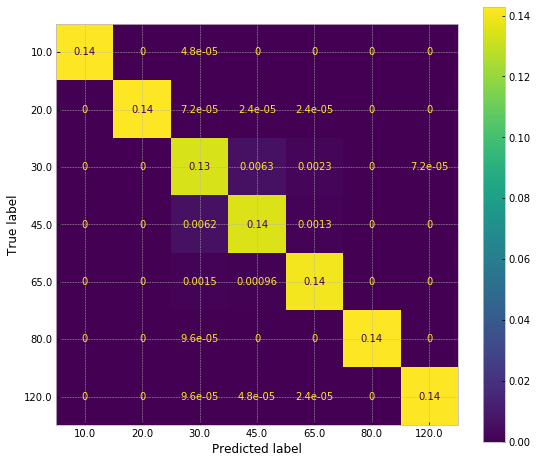

Test Data: Accuracy Score

0.7287066246056783


Test Data: Classification Report

              precision    recall  f1-score   support

        20.0       0.17      0.25      0.20         4
        30.0       0.86      0.82      0.84      1468
        45.0       0.55      0.59      0.57       554
        65.0       0.40      0.48      0.44       176
        80.0       0.00      0.00      0.00         3
       120.0       0.57      0.29      0.38        14

    accuracy                           0.73      2219
   macro avg       0.42      0.40      0.40      2219
weighted avg       0.74      0.73      0.73      2219



Test Data: Kappa Cohen Score

0.46533052464400737


Test Data: Confusion Matrix

[[   1    1    2    0    0    0]
 [   2 1202  195   67    0    2]
 [   2  166  325   60    0    1]
 [   1   31   59   85    0    0]
 [   0    2    0    1    0    0]
 [   0    3    6    1    0    4]]


Test Data: Normalized Confusion Matrix



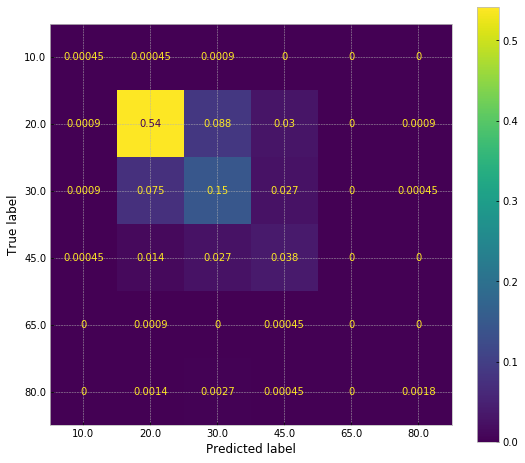

In [79]:
fit_predict_plot(X_train_SMOTE,X_test,y_train_SMOTE,y_test, RS_best_est_rf)

### Grid Search CV

In [80]:
# Create the parameter grid based on the results of random search 

n_estimators = range(1,40)
criterion = ['entropy']
max_features = ['sqrt']
max_depth = range(15,30, 10)
min_samples_split = range(7,31, 10)
min_samples_leaf = range(1,20, 10)
bootstrap = [False]

                    

param_grid = {'n_estimators':n_estimators,
              'criterion':criterion,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap 
              }

pprint(param_grid)

{'bootstrap': [False],
 'criterion': ['entropy'],
 'max_depth': range(15, 30, 10),
 'max_features': ['sqrt'],
 'min_samples_leaf': range(1, 20, 10),
 'min_samples_split': range(7, 31, 10),
 'n_estimators': range(1, 40)}


In [81]:
grid_search_cv(X_train_SMOTE,y_train_SMOTE, RS_best_est_rf, params=param_grid)

Fitting 3 folds for each of 468 candidates, totalling 1404 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 1404 out of 1404 | elapsed: 19.4min finished




Best Parameters:
 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 37}


Best Estimator:
 RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=25, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=37,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


Best Score:
 0.9391897154130634


Best Index:
 270


Scorer:
 make_scorer(f1_score, pos_label=None, average=weighted)


(RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                        criterion='entropy', max_depth=25, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=7,
                        min_weight_fraction_leaf=0.0, n_estimators=37,
                        n_jobs=None, oob_score=False, random_state=0, verbose=0,
                        warm_start=False),
 {'bootstrap': False,
  'criterion': 'entropy',
  'max_depth': 25,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 7,
  'n_estimators': 37})

In [82]:
cv_restuls_gs_rf = cv_results_gs
cv_restuls_gs_rf.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.385967,0.081551,0.033245,0.002617,False,entropy,15,sqrt,1,7,1,"{'bootstrap': False, 'criterion': 'entropy', '...",0.849505,0.855415,0.865903,0.856941,0.006781,452,0.907268,0.905413,0.918828,0.910503,0.005935
1,0.685167,0.039316,0.040891,0.003731,False,entropy,15,sqrt,1,7,2,"{'bootstrap': False, 'criterion': 'entropy', '...",0.886426,0.880317,0.890866,0.885870,0.004324,380,0.949894,0.944152,0.949124,0.947723,0.002545
2,1.036894,0.086150,0.043883,0.004534,False,entropy,15,sqrt,1,7,3,"{'bootstrap': False, 'criterion': 'entropy', '...",0.897203,0.894544,0.902101,0.897949,0.003130,216,0.961383,0.959039,0.960212,0.960211,0.000957
3,1.242678,0.066895,0.048535,0.003292,False,entropy,15,sqrt,1,7,4,"{'bootstrap': False, 'criterion': 'entropy', '...",0.900989,0.904091,0.909623,0.904901,0.003571,203,0.964605,0.965446,0.965756,0.965269,0.000486
4,1.532199,0.029660,0.054929,0.003486,False,entropy,15,sqrt,1,7,5,"{'bootstrap': False, 'criterion': 'entropy', '...",0.906175,0.908349,0.917052,0.910526,0.004699,172,0.967140,0.967982,0.969673,0.968265,0.001054


In [83]:
GS_best_est_rf = GS_best_est
GS_best_est_rf

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=25, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=37,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [84]:
GS_best_params

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'n_estimators': 37}

### Running the model with best parameters from GS CV

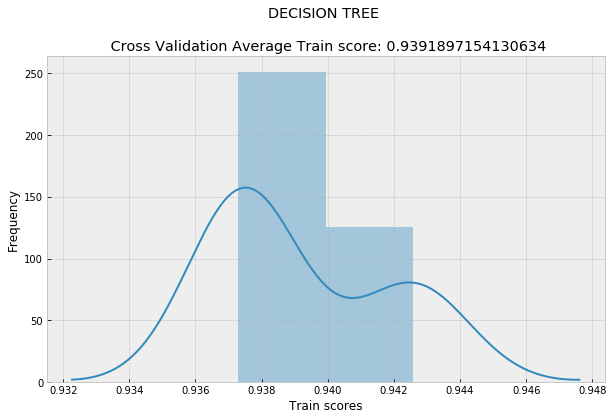

In [85]:
sk = StratifiedKFold(n_splits=3, random_state=0, shuffle=True)
cv_results = cross_val_score(GS_best_est_rf, X_train_SMOTE, y_train_SMOTE, cv=sk, scoring='f1_weighted')
plt.figure(figsize=(10,6))
sns.distplot(cv_results)
plt.xlabel('Train scores')
plt.ylabel('Frequency')
plt.title('DECISION TREE \n\n Cross Validation Average Train score: {}'.format(np.mean(cv_results)))
plt.show()

### Making Predictions using cross validation

Train Data: Accuracy Score

0.9454121156714622


Train Data: Classification Report

              precision    recall  f1-score   support

        10.0       1.00      1.00      1.00      5938
        20.0       1.00      1.00      1.00      5938
        30.0       0.86      0.85      0.85      5938
        45.0       0.85      0.84      0.85      5938
        65.0       0.91      0.93      0.92      5938
        80.0       1.00      1.00      1.00      5938
       120.0       1.00      1.00      1.00      5938

    accuracy                           0.95     41566
   macro avg       0.95      0.95      0.95     41566
weighted avg       0.95      0.95      0.95     41566



Train Data: Kappa Cohen Score

0.9363141349500392


Train Data: Confusion Matrix

[[5934    0    4    0    0    0    0]
 [   0 5930    5    3    0    0    0]
 [   0    8 5026  651  244    0    9]
 [   2    3  638 5005  283    0    7]
 [   0    2  173  211 5547    0    5]
 [   0    0    6    0    0 5932    0]
 [   0 

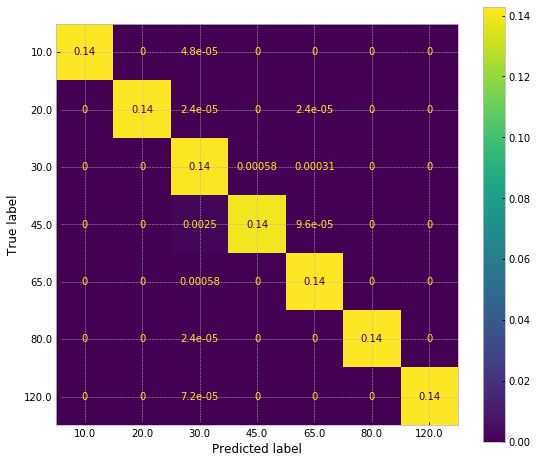

Test Data: Accuracy Score

0.7142857142857143


Test Data: Classification Report

              precision    recall  f1-score   support

        20.0       0.00      0.00      0.00         4
        30.0       0.77      0.90      0.83      1468
        45.0       0.53      0.44      0.48       554
        65.0       0.48      0.11      0.18       176
        80.0       0.00      0.00      0.00         3
       120.0       0.50      0.07      0.12        14

    accuracy                           0.71      2219
   macro avg       0.38      0.25      0.27      2219
weighted avg       0.68      0.71      0.68      2219



Test Data: Kappa Cohen Score

0.34244507272923586


Test Data: Confusion Matrix

[[   0    3    1    0    0    0]
 [   0 1321  140    7    0    0]
 [   0  297  243   14    0    0]
 [   0   88   67   20    0    1]
 [   0    2    1    0    0    0]
 [   0    9    3    1    0    1]]


Test Data: Normalized Confusion Matrix



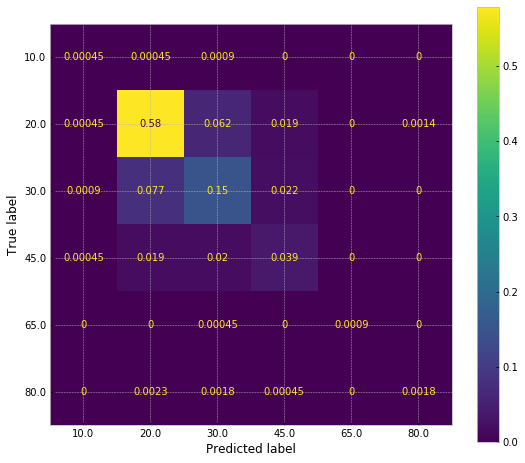

In [86]:
y_rf_pred_train, y_rf_pred_test = predict_cv(X_train_SMOTE, X_test, y_train_SMOTE, y_test, GS_best_est_rf)

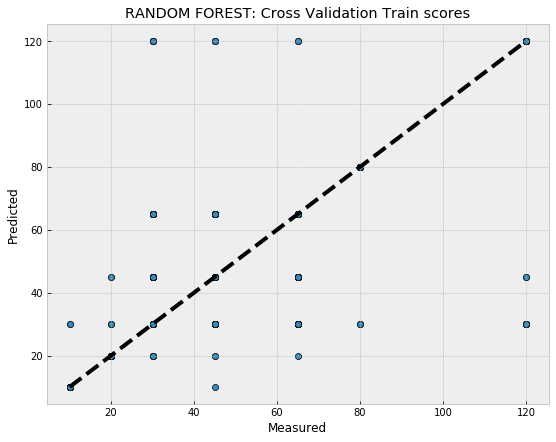

In [87]:
# Decision Tree Cross Validation Train scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_train_SMOTE, y_rf_pred_train, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('RANDOM FOREST: Cross Validation Train scores')
plt.show()

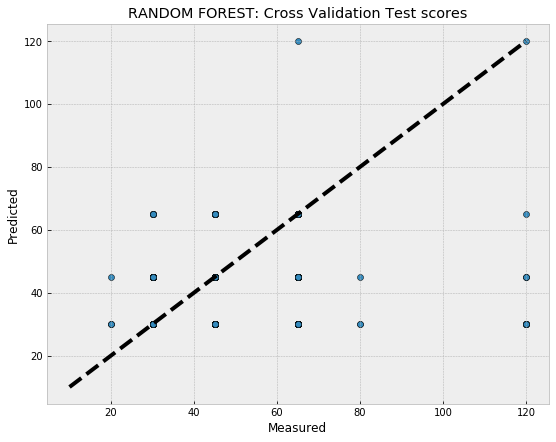

In [88]:
# Decision Tree Cross Validation Test scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_test, y_rf_pred_test, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('RANDOM FOREST: Cross Validation Test scores')
plt.show()

In [89]:
# Random Forest does better than Decision Tree in terms of overall accuracy and Kappa Cohen Scores

## Bagging

### Decision Tree

Train Data: Accuracy Score

0.9891738440071212


Train Data: Classification Report

              precision    recall  f1-score   support

        10.0       1.00      1.00      1.00      5938
        20.0       1.00      1.00      1.00      5938
        30.0       0.96      0.97      0.97      5938
        45.0       0.98      0.96      0.97      5938
        65.0       0.98      0.99      0.99      5938
        80.0       1.00      1.00      1.00      5938
       120.0       1.00      1.00      1.00      5938

    accuracy                           0.99     41566
   macro avg       0.99      0.99      0.99     41566
weighted avg       0.99      0.99      0.99     41566



Train Data: Kappa Cohen Score

0.9873694846749748


Train Data: Confusion Matrix

[[5936    0    2    0    0    0    0]
 [   0 5933    3    0    2    0    0]
 [   0    1 5789   94   53    0    1]
 [   0    0  167 5724   47    0    0]
 [   0    0   49   21 5868    0    0]
 [   0    0    3    0    0 5935    0]
 [   0 

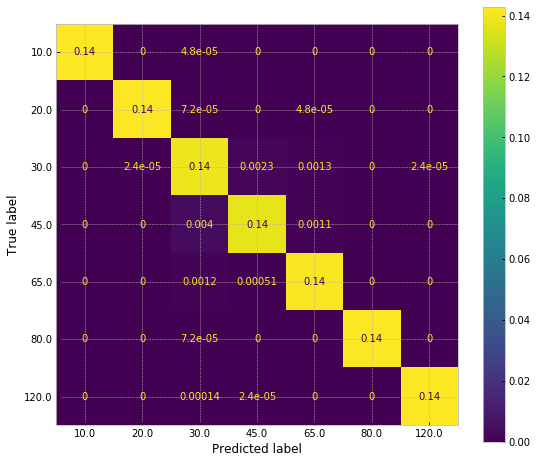

Test Data: Accuracy Score

0.7350157728706624


Test Data: Classification Report

              precision    recall  f1-score   support

        20.0       0.11      0.25      0.15         4
        30.0       0.85      0.83      0.84      1468
        45.0       0.58      0.56      0.57       554
        65.0       0.42      0.52      0.47       176
        80.0       0.50      0.33      0.40         3
       120.0       0.33      0.36      0.34        14

    accuracy                           0.74      2219
   macro avg       0.47      0.48      0.46      2219
weighted avg       0.74      0.74      0.74      2219



Test Data: Kappa Cohen Score

0.4730206042541333


Test Data: Confusion Matrix

[[   1    2    1    0    0    0]
 [   5 1222  169   64    1    7]
 [   2  183  310   58    0    1]
 [   1   31   50   92    0    2]
 [   0    1    0    1    1    0]
 [   0    0    6    3    0    5]]


Test Data: Normalized Confusion Matrix



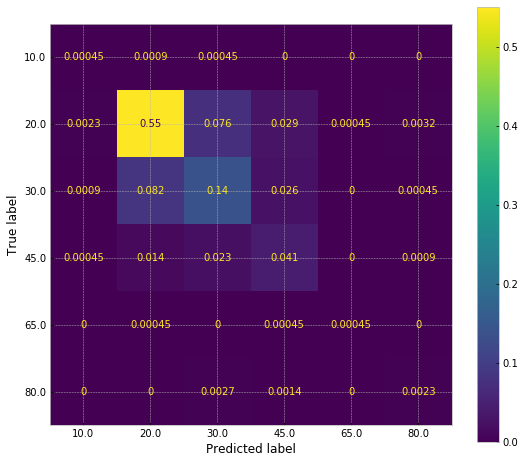

In [90]:
from sklearn.ensemble import BaggingClassifier

# taking the base model as a Decision Tree
bg_dt = BaggingClassifier(base_estimator=GS_best_est_dt, n_estimators=50, random_state=0, oob_score=True)
fit_predict_plot(X_train_SMOTE, X_test, y_train_SMOTE, y_test, bg_dt)
sk = StratifiedKFold(n_splits=3, random_state=0, shuffle=True)
cv_results_bg_dt = cross_val_score(bg_dt, X_train_SMOTE, y_train_SMOTE, cv=sk, scoring='f1_weighted')

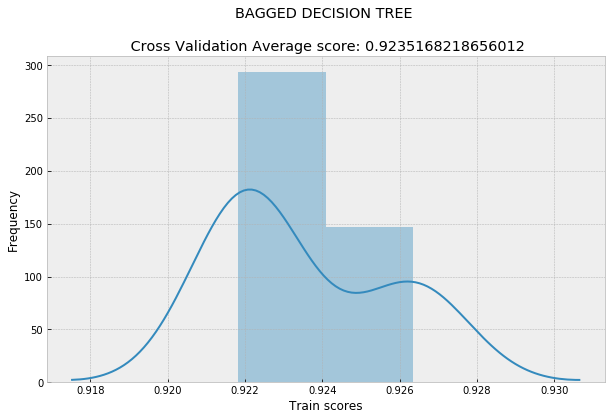

In [91]:
plt.figure(figsize=(10,6))
plt.xlabel('Train scores')
plt.ylabel('Frequency')
sns.distplot(cv_results_bg_dt)
plt.title('BAGGED DECISION TREE \n\n Cross Validation Average score: {}'.format(np.mean(cv_results_bg_dt)))
plt.show()

#### Making Predictions using cross validation

Train Data: Accuracy Score

0.9312178222585767


Train Data: Classification Report

              precision    recall  f1-score   support

        10.0       1.00      1.00      1.00      5938
        20.0       0.99      1.00      1.00      5938
        30.0       0.84      0.82      0.83      5938
        45.0       0.83      0.80      0.81      5938
        65.0       0.87      0.91      0.89      5938
        80.0       1.00      1.00      1.00      5938
       120.0       0.99      1.00      0.99      5938

    accuracy                           0.93     41566
   macro avg       0.93      0.93      0.93     41566
weighted avg       0.93      0.93      0.93     41566



Train Data: Kappa Cohen Score

0.9197541259683395


Train Data: Confusion Matrix

[[5934    0    3    1    0    0    0]
 [   0 5928    7    3    0    0    0]
 [   0   13 4869  703  327    4   22]
 [   5   13  710 4721  464    3   22]
 [   1    8  223  282 5402    4   18]
 [   0    0    6    1    0 5931    0]
 [   0 

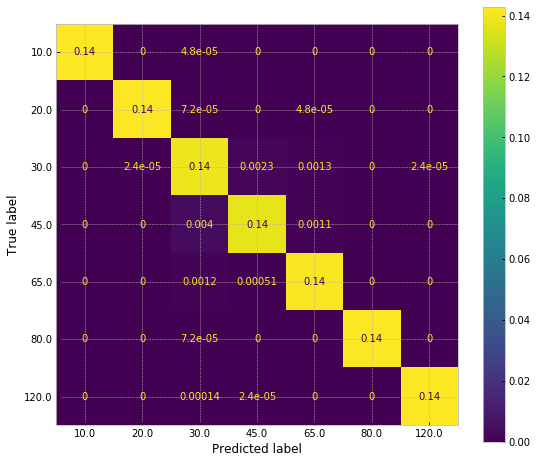

Test Data: Accuracy Score

0.7066246056782335


Test Data: Classification Report

              precision    recall  f1-score   support

        20.0       0.00      0.00      0.00         4
        30.0       0.76      0.90      0.83      1468
        45.0       0.52      0.40      0.45       554
        65.0       0.45      0.13      0.20       176
        80.0       0.00      0.00      0.00         3
       120.0       0.25      0.07      0.11        14

    accuracy                           0.71      2219
   macro avg       0.33      0.25      0.27      2219
weighted avg       0.67      0.71      0.68      2219



Test Data: Kappa Cohen Score

0.3227603989639126


Test Data: Confusion Matrix

[[   0    4    0    0    0    0]
 [   0 1320  138   10    0    0]
 [   0  310  224   18    0    2]
 [   0   87   65   23    0    1]
 [   0    2    1    0    0    0]
 [   0    9    4    0    0    1]]


Test Data: Normalized Confusion Matrix



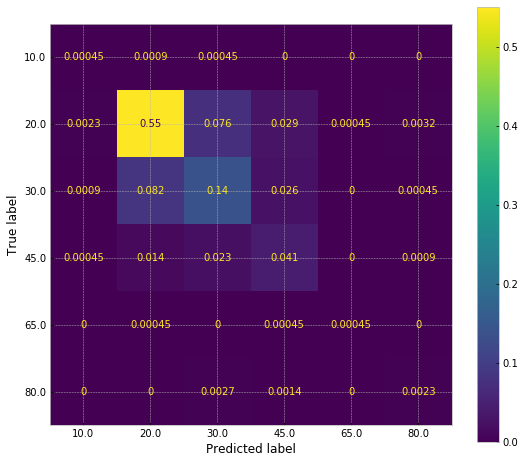

In [92]:
y_bg_dt_pred_train, y_bg_dt_pred_test = predict_cv(X_train_SMOTE, X_test, y_train_SMOTE, y_test, bg_dt)

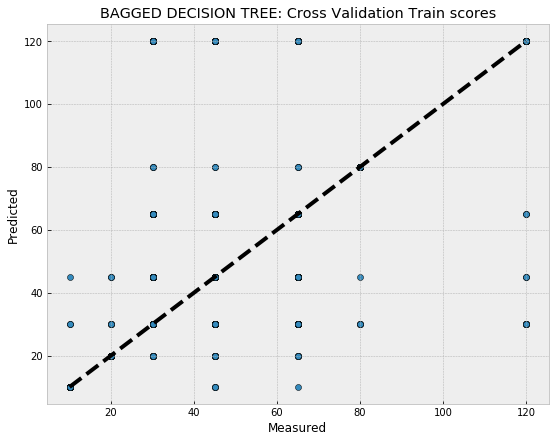

In [93]:
# Decision Tree Bagging Cross Validation Train scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_train_SMOTE, y_bg_dt_pred_train, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('BAGGED DECISION TREE: Cross Validation Train scores')
plt.show()

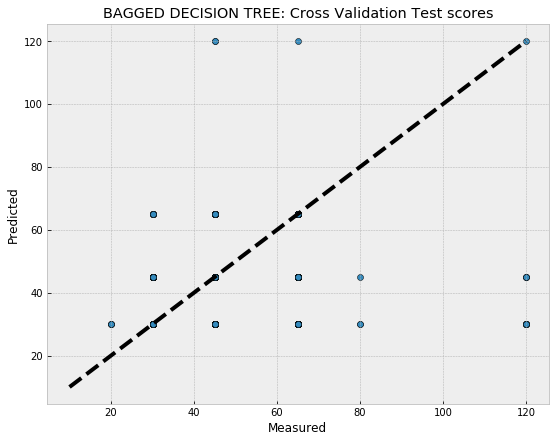

In [94]:
# Decision Tree Bagging Cross Validation Test scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_test, y_bg_dt_pred_test, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('BAGGED DECISION TREE: Cross Validation Test scores')
plt.show()

### Random Forest

Train Data: Accuracy Score

0.9899918202376943


Train Data: Classification Report

              precision    recall  f1-score   support

        10.0       1.00      1.00      1.00      5938
        20.0       1.00      1.00      1.00      5938
        30.0       0.96      0.97      0.97      5938
        45.0       0.98      0.97      0.97      5938
        65.0       0.99      0.99      0.99      5938
        80.0       1.00      1.00      1.00      5938
       120.0       1.00      1.00      1.00      5938

    accuracy                           0.99     41566
   macro avg       0.99      0.99      0.99     41566
weighted avg       0.99      0.99      0.99     41566



Train Data: Kappa Cohen Score

0.98832379027731


Train Data: Confusion Matrix

[[5936    0    2    0    0    0    0]
 [   0 5935    2    0    1    0    0]
 [   0    1 5781  102   53    0    1]
 [   0    0  168 5744   26    0    0]
 [   0    0   40   11 5887    0    0]
 [   0    0    4    0    0 5934    0]
 [   0   

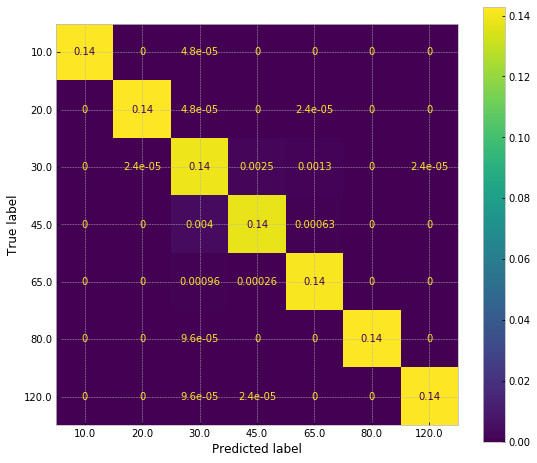

Test Data: Accuracy Score

0.7480847228481298


Test Data: Classification Report

              precision    recall  f1-score   support

        20.0       0.14      0.25      0.18         4
        30.0       0.86      0.85      0.85      1468
        45.0       0.58      0.59      0.59       554
        65.0       0.44      0.48      0.46       176
        80.0       0.00      0.00      0.00         3
       120.0       0.67      0.43      0.52        14

    accuracy                           0.75      2219
   macro avg       0.45      0.43      0.43      2219
weighted avg       0.75      0.75      0.75      2219



Test Data: Kappa Cohen Score

0.49410072869632815


Test Data: Confusion Matrix

[[   1    1    2    0    0    0]
 [   3 1241  168   54    0    2]
 [   2  169  328   54    0    1]
 [   1   32   59   84    0    0]
 [   0    2    0    1    0    0]
 [   0    4    4    0    0    6]]


Test Data: Normalized Confusion Matrix



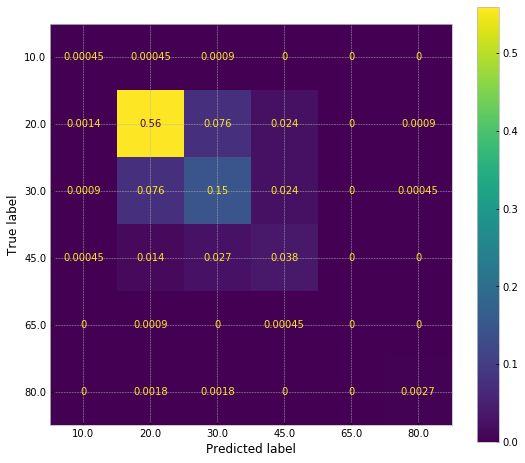

In [95]:
from sklearn.ensemble import BaggingClassifier

# taking the base model as a Decision Tree
bg_rf = BaggingClassifier(base_estimator=GS_best_est_rf, n_estimators=50, random_state=0, oob_score=True)
fit_predict_plot(X_train_SMOTE, X_test, y_train_SMOTE, y_test, bg_rf)
sk = StratifiedKFold(n_splits=3, random_state=0, shuffle=True)
cv_results_bg_rf = cross_val_score(bg_rf, X_train_SMOTE, y_train_SMOTE, cv=sk, scoring='f1_weighted')

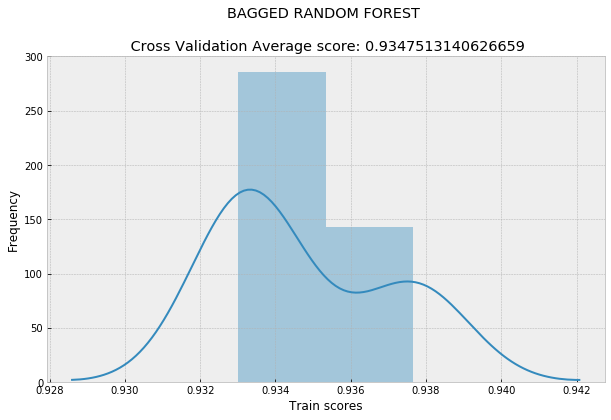

In [96]:
plt.figure(figsize=(10,6))
plt.xlabel('Train scores')
plt.ylabel('Frequency')
sns.distplot(cv_results_bg_rf)
plt.title('BAGGED RANDOM FOREST \n\n Cross Validation Average score: {}'.format(np.mean(cv_results_bg_rf)))
plt.show()

#### Making Predictions using cross validation

Train Data: Accuracy Score

0.9417071645094548


Train Data: Classification Report

              precision    recall  f1-score   support

        10.0       1.00      1.00      1.00      5938
        20.0       1.00      1.00      1.00      5938
        30.0       0.86      0.83      0.85      5938
        45.0       0.84      0.83      0.84      5938
        65.0       0.90      0.93      0.92      5938
        80.0       1.00      1.00      1.00      5938
       120.0       0.99      1.00      1.00      5938

    accuracy                           0.94     41566
   macro avg       0.94      0.94      0.94     41566
weighted avg       0.94      0.94      0.94     41566



Train Data: Kappa Cohen Score

0.9319916919276974


Train Data: Confusion Matrix

[[5934    0    4    0    0    0    0]
 [   0 5932    5    1    0    0    0]
 [   0   14 4955  704  253    0   12]
 [   3    3  635 4942  344    0   11]
 [   0    7  172  226 5523    1    9]
 [   0    0    6    0    0 5932    0]
 [   0 

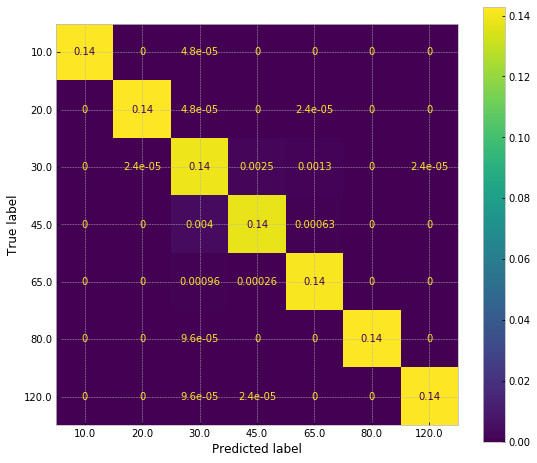

Test Data: Accuracy Score

0.7057232987832357


Test Data: Classification Report

              precision    recall  f1-score   support

        20.0       0.00      0.00      0.00         4
        30.0       0.74      0.93      0.83      1468
        45.0       0.53      0.35      0.42       554
        65.0       0.52      0.06      0.11       176
        80.0       0.00      0.00      0.00         3
       120.0       0.00      0.00      0.00        14

    accuracy                           0.71      2219
   macro avg       0.30      0.22      0.23      2219
weighted avg       0.67      0.71      0.66      2219



Test Data: Kappa Cohen Score

0.2854117689992509


Test Data: Confusion Matrix

[[   0    4    0    0    0    0]
 [   0 1363  104    1    0    0]
 [   0  354  192    8    0    0]
 [   0   99   65   11    0    1]
 [   0    2    1    0    0    0]
 [   0   11    2    1    0    0]]


Test Data: Normalized Confusion Matrix



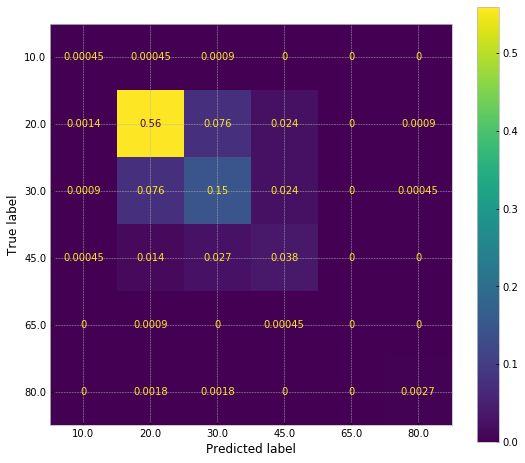

In [97]:
y_bg_rf_pred_train, y_bg_rf_pred_test = predict_cv(X_train_SMOTE, X_test, y_train_SMOTE, y_test, bg_rf)

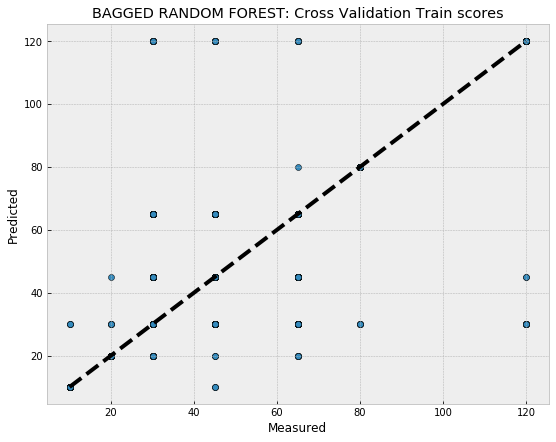

In [98]:
# Random Forest Bagging Cross Validation Train scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_train_SMOTE, y_bg_rf_pred_train, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('BAGGED RANDOM FOREST: Cross Validation Train scores')
plt.show()

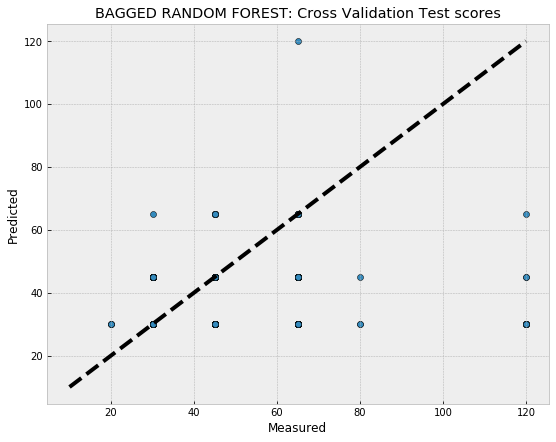

In [99]:
# Random Forest Bagging Cross Validation Test scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_test, y_bg_rf_pred_test, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('BAGGED RANDOM FOREST: Cross Validation Test scores')
plt.show()

In [ ]:
# Hyper-Tuned Random Forest seems to be preforming better than the models tried till now.

## Boosting

### Ada Boost 

#### Decision Tree

Train Data: Accuracy Score

0.9932396670355579


Train Data: Classification Report

              precision    recall  f1-score   support

        10.0       1.00      1.00      1.00      5938
        20.0       1.00      1.00      1.00      5938
        30.0       0.99      0.97      0.98      5938
        45.0       0.97      0.99      0.98      5938
        65.0       1.00      1.00      1.00      5938
        80.0       1.00      1.00      1.00      5938
       120.0       1.00      1.00      1.00      5938

    accuracy                           0.99     41566
   macro avg       0.99      0.99      0.99     41566
weighted avg       0.99      0.99      0.99     41566



Train Data: Kappa Cohen Score

0.9921129448748176


Train Data: Confusion Matrix

[[5936    0    2    0    0    0    0]
 [   0 5936    1    0    1    0    0]
 [   0    0 5746  182   10    0    0]
 [   0    0   58 5878    2    0    0]
 [   0    0   20    1 5917    0    0]
 [   0    0    1    0    0 5937    0]
 [   0 

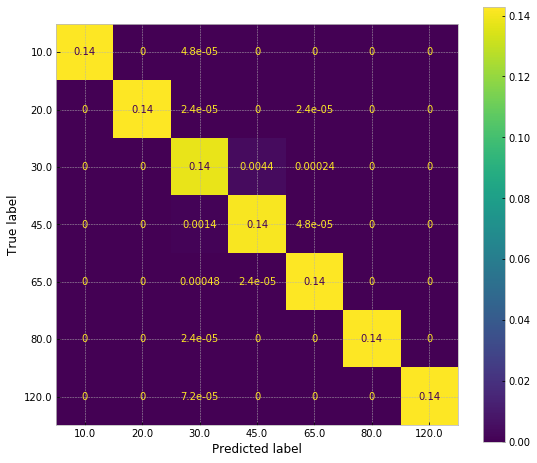

Test Data: Accuracy Score

0.7503379900856242


Test Data: Classification Report

              precision    recall  f1-score   support

        20.0       0.20      0.25      0.22         4
        30.0       0.87      0.83      0.85      1468
        45.0       0.57      0.64      0.60       554
        65.0       0.49      0.48      0.48       176
        80.0       1.00      0.67      0.80         3
       120.0       0.83      0.36      0.50        14

    accuracy                           0.75      2219
   macro avg       0.66      0.54      0.58      2219
weighted avg       0.76      0.75      0.75      2219



Test Data: Kappa Cohen Score

0.5042702506743404


Test Data: Confusion Matrix

[[   1    2    1    0    0    0]
 [   2 1219  207   39    0    1]
 [   1  151  354   48    0    0]
 [   1   33   58   84    0    0]
 [   0    0    1    0    2    0]
 [   0    3    5    1    0    5]]


Test Data: Normalized Confusion Matrix



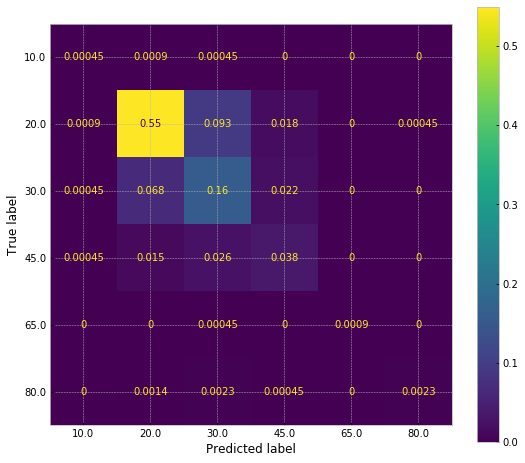

In [100]:
ab_dt = AdaBoostClassifier(base_estimator=GS_best_est_dt, n_estimators= 50, random_state=0)
fit_predict_plot(X_train_SMOTE, X_test, y_train_SMOTE, y_test, ab_dt)
sk = StratifiedKFold(n_splits=3, random_state=0, shuffle=True)
cv_results_ab_dt = cross_val_score(ab_dt, X_train_SMOTE, y_train_SMOTE, cv=sk, scoring='f1_weighted')

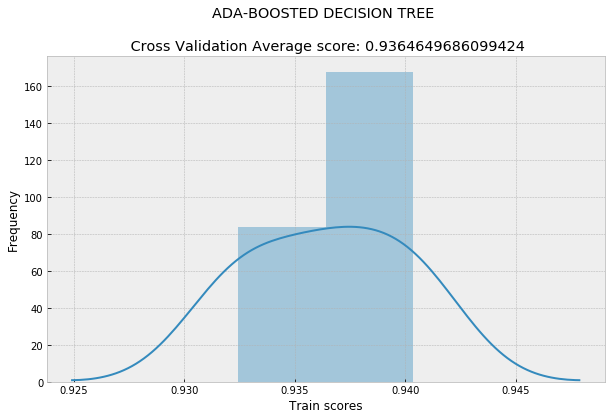

In [101]:
plt.figure(figsize=(10,6))
plt.xlabel('Train scores')
plt.ylabel('Frequency')
sns.distplot(cv_results_ab_dt)
plt.title('ADA-BOOSTED DECISION TREE \n\n Cross Validation Average score: {}'.format(np.mean(cv_results_ab_dt)))
plt.show()

In [102]:
# Making Presdiction using Cross Validation

Train Data: Accuracy Score

0.9430544194774575


Train Data: Classification Report

              precision    recall  f1-score   support

        10.0       1.00      1.00      1.00      5938
        20.0       1.00      1.00      1.00      5938
        30.0       0.86      0.82      0.84      5938
        45.0       0.83      0.86      0.84      5938
        65.0       0.92      0.92      0.92      5938
        80.0       1.00      1.00      1.00      5938
       120.0       1.00      1.00      1.00      5938

    accuracy                           0.94     41566
   macro avg       0.94      0.94      0.94     41566
weighted avg       0.94      0.94      0.94     41566



Train Data: Kappa Cohen Score

0.9335634893903672


Train Data: Confusion Matrix

[[5936    0    2    0    0    0    0]
 [   0 5930    7    0    1    0    0]
 [   0   10 4898  786  233    2    9]
 [   3    2  582 5089  258    0    4]
 [   1    2  176  271 5485    0    3]
 [   0    0    3    1    0 5934    0]
 [   0 

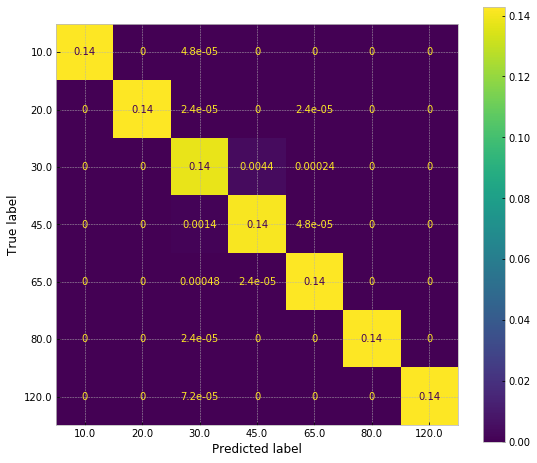

Test Data: Accuracy Score

0.7052726453357369


Test Data: Classification Report

              precision    recall  f1-score   support

        20.0       0.00      0.00      0.00         4
        30.0       0.77      0.88      0.82      1468
        45.0       0.51      0.45      0.48       554
        65.0       0.42      0.14      0.21       176
        80.0       0.00      0.00      0.00         3
       120.0       1.00      0.07      0.13        14

    accuracy                           0.71      2219
   macro avg       0.45      0.26      0.27      2219
weighted avg       0.68      0.71      0.68      2219



Test Data: Kappa Cohen Score

0.3367312754028695


Test Data: Confusion Matrix

[[   0    4    0    0    0    0]
 [   1 1290  163   14    0    0]
 [   0  286  249   19    0    0]
 [   0   84   67   25    0    0]
 [   0    2    1    0    0    0]
 [   0    8    4    1    0    1]]


Test Data: Normalized Confusion Matrix



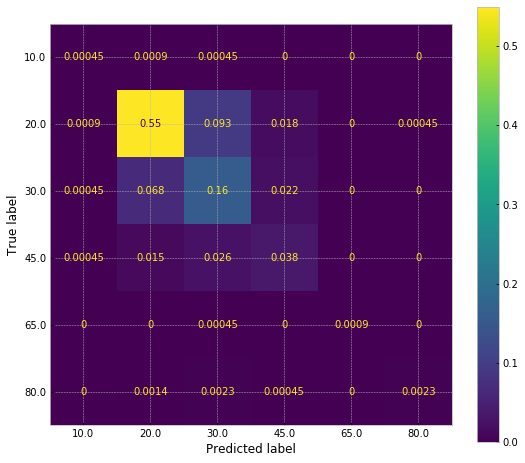

In [103]:
y_ab_dt_pred_train, y_ab_dt_pred_test = predict_cv(X_train_SMOTE, X_test, y_train_SMOTE, y_test, ab_dt)

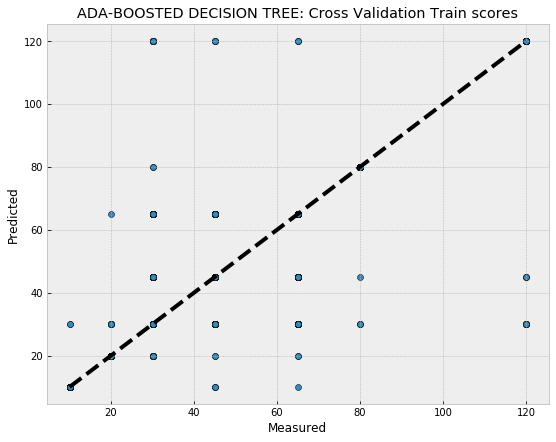

In [105]:
# Decision Tree Adaboost Cross Validation Train scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_train_SMOTE, y_ab_dt_pred_train, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('ADA-BOOSTED DECISION TREE: Cross Validation Train scores')
plt.show()

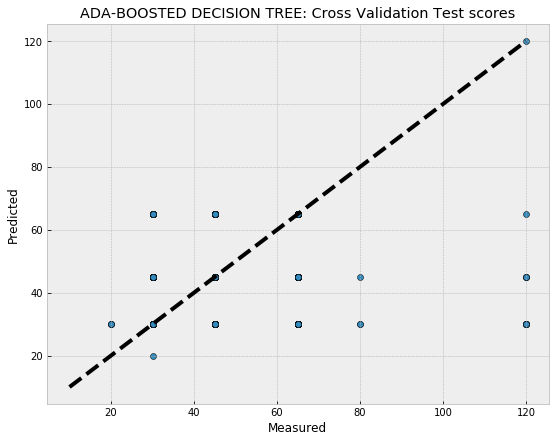

In [106]:
# Decision Tree Adaboost Cross Validation Test scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_test, y_ab_dt_pred_test, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('ADA-BOOSTED DECISION TREE: Cross Validation Test scores')
plt.show()

#### Random Forest

Train Data: Accuracy Score

0.9952846076119906


Train Data: Classification Report

              precision    recall  f1-score   support

        10.0       1.00      1.00      1.00      5938
        20.0       1.00      1.00      1.00      5938
        30.0       0.98      0.99      0.98      5938
        45.0       0.99      0.98      0.99      5938
        65.0       1.00      1.00      1.00      5938
        80.0       1.00      1.00      1.00      5938
       120.0       1.00      1.00      1.00      5938

    accuracy                           1.00     41566
   macro avg       1.00      1.00      1.00     41566
weighted avg       1.00      1.00      1.00     41566



Train Data: Kappa Cohen Score

0.9944987088806556


Train Data: Confusion Matrix

[[5936    0    2    0    0    0    0]
 [   0 5936    1    0    1    0    0]
 [   0    0 5891   36   10    0    1]
 [   0    0  118 5817    3    0    0]
 [   0    0   21    0 5917    0    0]
 [   0    0    1    0    0 5937    0]
 [   0 

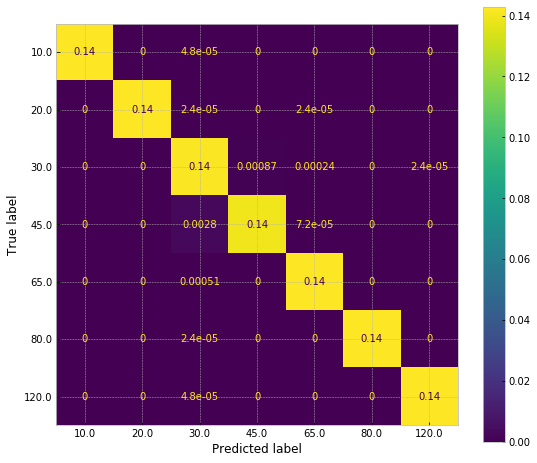

Test Data: Accuracy Score

0.7688147814330779


Test Data: Classification Report

              precision    recall  f1-score   support

        20.0       0.33      0.25      0.29         4
        30.0       0.86      0.86      0.86      1468
        45.0       0.62      0.62      0.62       554
        65.0       0.51      0.52      0.52       176
        80.0       1.00      0.67      0.80         3
       120.0       0.67      0.29      0.40        14

    accuracy                           0.77      2219
   macro avg       0.66      0.53      0.58      2219
weighted avg       0.77      0.77      0.77      2219



Test Data: Kappa Cohen Score

0.5305222193673551


Test Data: Confusion Matrix

[[   1    1    2    0    0    0]
 [   0 1263  159   44    0    2]
 [   1  167  344   42    0    0]
 [   1   35   48   92    0    0]
 [   0    0    1    0    2    0]
 [   0    4    5    1    0    4]]


Test Data: Normalized Confusion Matrix



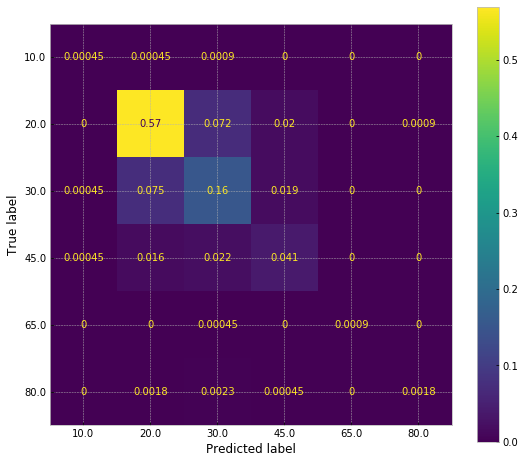

In [107]:
ab_rf = AdaBoostClassifier(base_estimator=GS_best_est_rf, n_estimators= 50, random_state=0)
fit_predict_plot(X_train_SMOTE, X_test, y_train_SMOTE, y_test, ab_rf)
sk = StratifiedKFold(n_splits=3, random_state=0, shuffle=True)
cv_results_ab_rf = cross_val_score(ab_rf, X_train_SMOTE, y_train_SMOTE, cv=sk, scoring='f1_weighted')

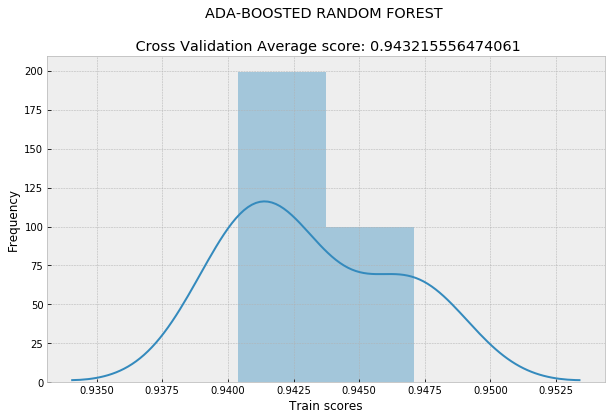

In [108]:
plt.figure(figsize=(10,6))
plt.xlabel('Train scores')
plt.ylabel('Frequency')
sns.distplot(cv_results_ab_rf)
plt.title('ADA-BOOSTED RANDOM FOREST \n\n Cross Validation Average score: {}'.format(np.mean(cv_results_ab_rf)))
plt.show()

In [109]:
# Making Presdiction using Cross Validation

Train Data: Accuracy Score

0.9483712649761824


Train Data: Classification Report

              precision    recall  f1-score   support

        10.0       1.00      1.00      1.00      5938
        20.0       1.00      1.00      1.00      5938
        30.0       0.87      0.84      0.85      5938
        45.0       0.84      0.86      0.85      5938
        65.0       0.93      0.94      0.93      5938
        80.0       1.00      1.00      1.00      5938
       120.0       1.00      1.00      1.00      5938

    accuracy                           0.95     41566
   macro avg       0.95      0.95      0.95     41566
weighted avg       0.95      0.95      0.95     41566



Train Data: Kappa Cohen Score

0.9397664758055462


Train Data: Confusion Matrix

[[5935    0    3    0    0    0    0]
 [   0 5930    7    0    1    0    0]
 [   0   10 4976  726  216    0   10]
 [   3    2  569 5135  228    0    1]
 [   0    0  138  216 5584    0    0]
 [   0    0    5    0    0 5933    0]
 [   0 

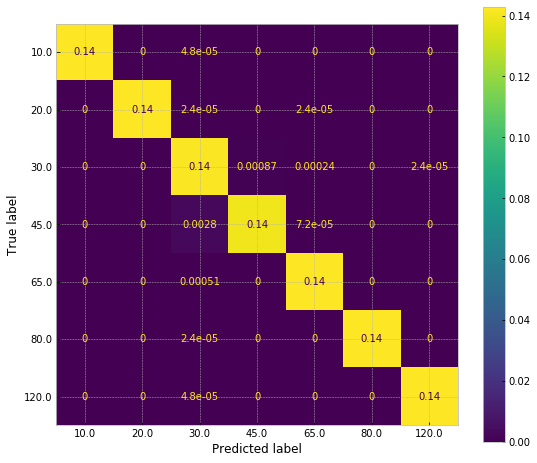

Test Data: Accuracy Score

0.6714736367733213


Test Data: Classification Report

              precision    recall  f1-score   support

        20.0       0.00      0.00      0.00         4
        30.0       0.75      0.87      0.81      1468
        45.0       0.44      0.35      0.39       554
        65.0       0.23      0.07      0.10       176
        80.0       0.00      0.00      0.00         3
       120.0       0.33      0.07      0.12        14

    accuracy                           0.67      2219
   macro avg       0.29      0.23      0.24      2219
weighted avg       0.62      0.67      0.64      2219



Test Data: Kappa Cohen Score

0.24628044416612627


Test Data: Confusion Matrix

[[   0    4    0    0    0    0]
 [   1 1283  169   15    0    0]
 [   0  334  194   25    0    1]
 [   0   87   75   12    1    1]
 [   0    2    1    0    0    0]
 [   0    9    3    1    0    1]]


Test Data: Normalized Confusion Matrix



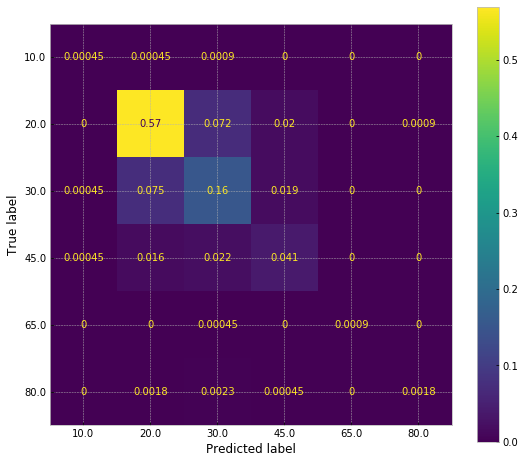

In [110]:
y_ab_rf_pred_train, y_ab_rf_pred_test = predict_cv(X_train_SMOTE, X_test, y_train_SMOTE, y_test, ab_rf)

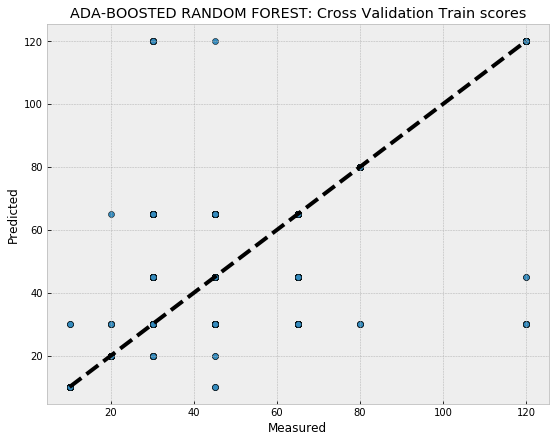

In [111]:
# Random Forest Adaboost Cross Validation Train scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_train_SMOTE, y_ab_rf_pred_train, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('ADA-BOOSTED RANDOM FOREST: Cross Validation Train scores')
plt.show()

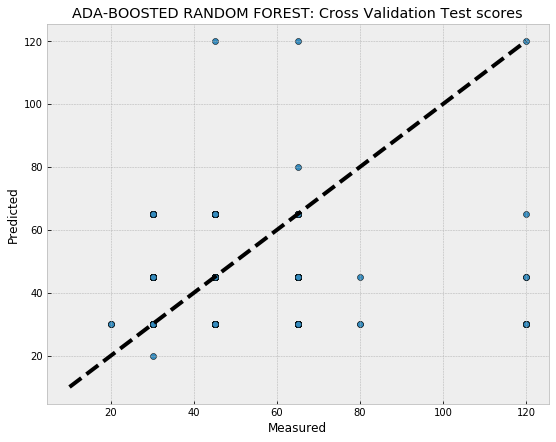

In [112]:
# Random Forest Adaboost Cross Validation Test scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_test, y_ab_rf_pred_test, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('ADA-BOOSTED RANDOM FOREST: Cross Validation Test scores')
plt.show()

### Gradient Boost

Train Data: Accuracy Score

0.8177356493287783


Train Data: Classification Report

              precision    recall  f1-score   support

        10.0       0.99      1.00      0.99      5938
        20.0       0.90      1.00      0.94      5938
        30.0       0.69      0.64      0.67      5938
        45.0       0.57      0.47      0.51      5938
        65.0       0.63      0.62      0.62      5938
        80.0       0.97      1.00      0.98      5938
       120.0       0.90      1.00      0.94      5938

    accuracy                           0.82     41566
   macro avg       0.81      0.82      0.81     41566
weighted avg       0.81      0.82      0.81     41566



Train Data: Kappa Cohen Score

0.7873582575502414


Train Data: Confusion Matrix

[[5937    0    1    0    0    0    0]
 [   0 5934    2    2    0    0    0]
 [  34  230 3827 1013  597   66  171]
 [  24  188 1114 2763 1533   48  268]
 [  11  270  618 1060 3663   71  245]
 [   0    0    2    1    0 5934    1]
 [   0 

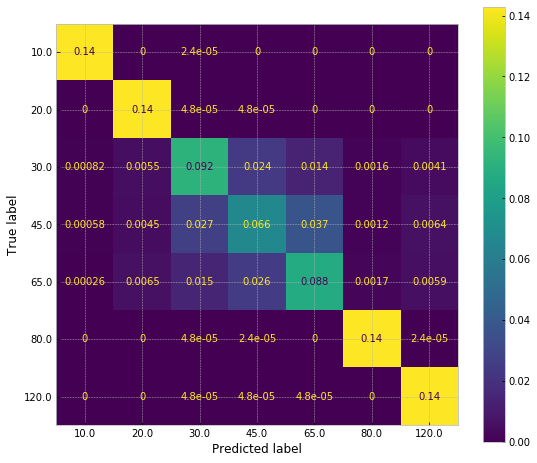

Test Data: Accuracy Score

0.5615141955835962


Test Data: Classification Report

              precision    recall  f1-score   support

        10.0       0.00      0.00      0.00         0
        20.0       0.01      0.25      0.03         4
        30.0       0.84      0.63      0.72      1468
        45.0       0.41      0.42      0.42       554
        65.0       0.21      0.43      0.29       176
        80.0       0.00      0.00      0.00         3
       120.0       0.11      0.64      0.19        14

    accuracy                           0.56      2219
   macro avg       0.23      0.34      0.23      2219
weighted avg       0.68      0.56      0.61      2219



Test Data: Kappa Cohen Score

0.2636023435533523


Test Data: Confusion Matrix

[[  0   0   0   0   0   0   0]
 [  0   1   2   1   0   0   0]
 [ 12  48 925 287 142  14  40]
 [  1  17 136 235 137   8  20]
 [  2   7  32  45  76   1  13]
 [  0   0   1   1   1   0   0]
 [  0   0   1   4   0   0   9]]


Test Data: Normaliz

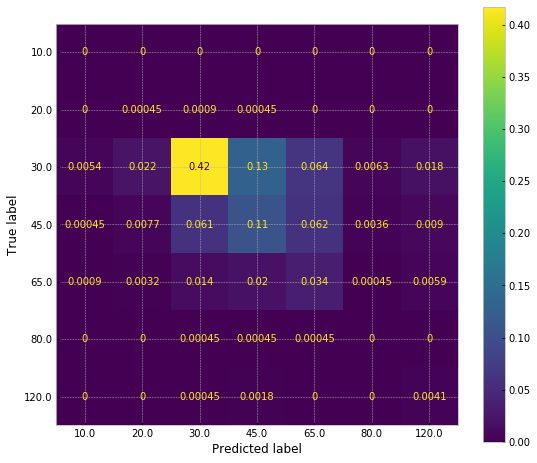

In [113]:
gb_dt = GradientBoostingClassifier(n_estimators= 50, random_state=0)
fit_predict_plot(X_train_SMOTE, X_test, y_train_SMOTE, y_test, gb_dt)
sk = StratifiedKFold(n_splits=3, random_state=0, shuffle=True)
cv_results_gb_dt = cross_val_score(gb_dt, X_train_SMOTE, y_train_SMOTE, cv=sk, scoring='f1_weighted')

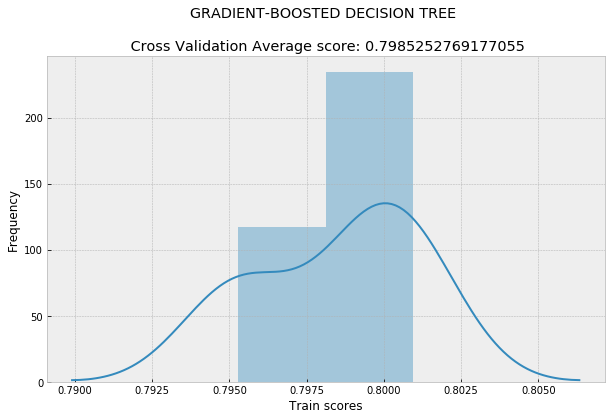

In [114]:
plt.figure(figsize=(10,6))
plt.xlabel('Train scores')
plt.ylabel('Frequency')
sns.distplot(cv_results_gb_dt)
plt.title('GRADIENT-BOOSTED DECISION TREE \n\n Cross Validation Average score: {}'.format(np.mean(cv_results_gb_dt)))
plt.show()

#### Making redictions using cross validation

Train Data: Accuracy Score

0.8088341432901891


Train Data: Classification Report

              precision    recall  f1-score   support

        10.0       0.98      1.00      0.99      5938
        20.0       0.89      1.00      0.94      5938
        30.0       0.68      0.62      0.65      5938
        45.0       0.54      0.45      0.49      5938
        65.0       0.61      0.60      0.61      5938
        80.0       0.97      1.00      0.98      5938
       120.0       0.89      1.00      0.94      5938

    accuracy                           0.81     41566
   macro avg       0.80      0.81      0.80     41566
weighted avg       0.80      0.81      0.80     41566



Train Data: Kappa Cohen Score

0.7769731671718872


Train Data: Confusion Matrix

[[5937    0    1    0    0    0    0]
 [   0 5933    3    1    1    0    0]
 [  38  224 3664 1116  639   67  190]
 [  33  206 1107 2643 1623   53  273]
 [  21  271  591 1154 3584   61  256]
 [   0    0    2    2    0 5932    2]
 [   0 

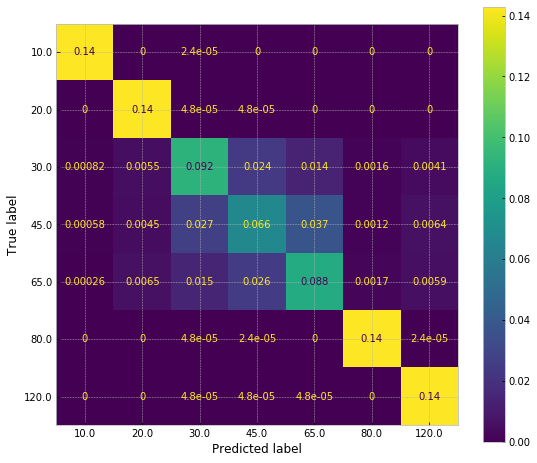

Test Data: Accuracy Score

0.6800360522757999


Test Data: Classification Report

              precision    recall  f1-score   support

        20.0       0.00      0.00      0.00         4
        30.0       0.73      0.92      0.81      1468
        45.0       0.46      0.26      0.33       554
        65.0       0.32      0.05      0.09       176
        80.0       0.00      0.00      0.00         3
       120.0       0.25      0.14      0.18        14

    accuracy                           0.68      2219
   macro avg       0.29      0.23      0.24      2219
weighted avg       0.62      0.68      0.63      2219



Test Data: Kappa Cohen Score

0.21433857410148283


Test Data: Confusion Matrix

[[   0    4    0    0    0    0]
 [   0 1354  106    6    1    1]
 [   1  394  144   12    1    2]
 [   0  107   56    9    1    3]
 [   0    1    1    1    0    0]
 [   0    7    5    0    0    2]]


Test Data: Normalized Confusion Matrix



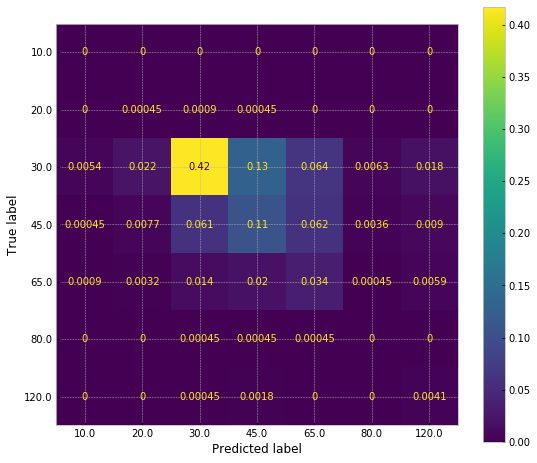

In [115]:
y_gb_dt_pred_train, y_gb_dt_pred_test = predict_cv(X_train_SMOTE, X_test, y_train_SMOTE, y_test, gb_dt)

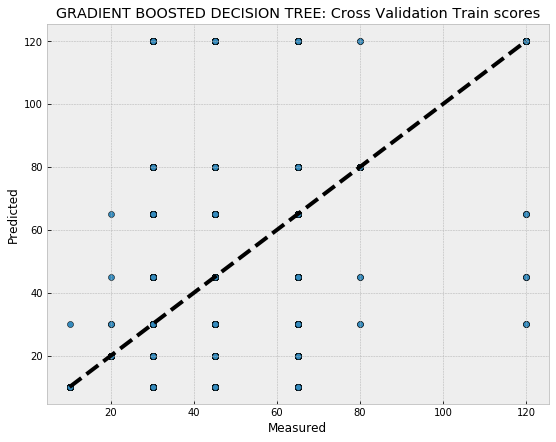

In [116]:
# Decision Tree Gradient Boost Cross Validation Train scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_train_SMOTE, y_gb_dt_pred_train, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('GRADIENT BOOSTED DECISION TREE: Cross Validation Train scores')
plt.show()

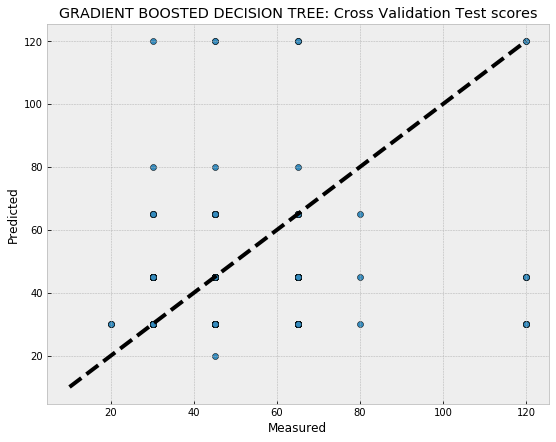

In [117]:
# Decision Tree Gradient Boost Cross Validation Test scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_test, y_gb_dt_pred_test, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('GRADIENT BOOSTED DECISION TREE: Cross Validation Test scores')
plt.show()

### XG Boost

In [126]:
xgb_dt = xgb.XGBClassifier(random_state = 0)
parameters_xgb = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 5,10, 105, 20, 205, 30, 305, 40 ,45, 50, 55],
     "min_child_weight" : [ 1, 5, 10, 15, 20, 25, 30],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
     }

Train Data: Accuracy Score

0.9594861184622047


Train Data: Classification Report

              precision    recall  f1-score   support

        10.0       1.00      1.00      1.00      5938
        20.0       1.00      1.00      1.00      5938
        30.0       0.89      0.92      0.90      5938
        45.0       0.90      0.86      0.88      5938
        65.0       0.92      0.94      0.93      5938
        80.0       1.00      1.00      1.00      5938
       120.0       1.00      1.00      1.00      5938

    accuracy                           0.96     41566
   macro avg       0.96      0.96      0.96     41566
weighted avg       0.96      0.96      0.96     41566



Train Data: Kappa Cohen Score

0.9527338048725721


Train Data: Confusion Matrix

[[5936    0    2    0    0    0    0]
 [   0 5936    1    0    1    0    0]
 [   0    4 5446  352  134    0    2]
 [   0    0  467 5127  344    0    0]
 [   0    1  180  193 5564    0    0]
 [   0    0    0    1    0 5937    0]
 [   0 

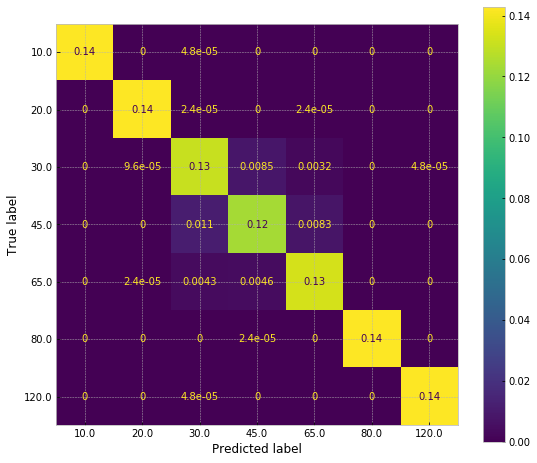

Test Data: Accuracy Score

0.7246507435781884


Test Data: Classification Report

              precision    recall  f1-score   support

        20.0       0.14      0.25      0.18         4
        30.0       0.84      0.83      0.84      1468
        45.0       0.55      0.55      0.55       554
        65.0       0.38      0.42      0.40       176
        80.0       1.00      0.67      0.80         3
       120.0       0.67      0.43      0.52        14

    accuracy                           0.72      2219
   macro avg       0.60      0.52      0.55      2219
weighted avg       0.73      0.72      0.73      2219



Test Data: Kappa Cohen Score

0.4484507459371413


Test Data: Confusion Matrix

[[   1    3    0    0    0    0]
 [   3 1219  180   63    0    3]
 [   2  187  306   59    0    0]
 [   1   34   67   74    0    0]
 [   0    0    0    1    2    0]
 [   0    2    6    0    0    6]]


Test Data: Normalized Confusion Matrix



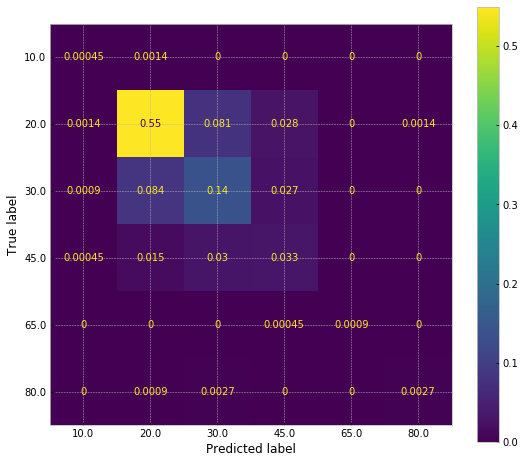

In [127]:
fit_predict_plot(X_train_SMOTE,X_test,y_train_SMOTE,y_test, xgb_dt)

#### Randomized Search CV

In [128]:
random_search_cv(X_train_SMOTE,y_train_SMOTE, xgb_dt, parameters_xgb)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 41.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 75.1min finished




Best Parameters:
 {'min_child_weight': 1, 'max_depth': 50, 'gamma': 0.1, 'eta': 0.3, 'colsample_bytree': 0.7}


Best Estimator:
 XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eta=0.3, gamma=0.1,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=50,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)


Best Score:
 0.9359646199648602


Best Index:
 70


Scorer:
 make_scorer(f1_score, pos_label=None, average=weighted)


(XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.7, eta=0.3, gamma=0.1,
               gpu_id=-1, importance_type='gain', interaction_constraints=None,
               learning_rate=0.300000012, max_delta_step=0, max_depth=50,
               min_child_weight=1, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=0, num_parallel_tree=1,
               objective='multi:softprob', random_state=0, reg_alpha=0,
               reg_lambda=1, scale_pos_weight=None, subsample=1,
               tree_method=None, validate_parameters=False, verbosity=None),
 {'min_child_weight': 1,
  'max_depth': 50,
  'gamma': 0.1,
  'eta': 0.3,
  'colsample_bytree': 0.7})

In [130]:
cv_restuls_rs_xgb_dt = cv_results_rs
cv_restuls_rs_xgb_dt.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_child_weight,param_max_depth,param_gamma,param_eta,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,115.691147,2.713007,3.412950,0.282936,1,45,0.3,0.3,0.3,"{'min_child_weight': 1, 'max_depth': 45, 'gamm...",0.916045,0.916813,0.923466,0.918775,0.003332,56,0.996433,0.996398,0.996541,0.996457,0.000061
1,102.495907,2.431594,3.086934,0.395728,15,205,0.4,0.1,0.4,"{'min_child_weight': 15, 'max_depth': 205, 'ga...",0.913494,0.914146,0.918433,0.915357,0.002191,71,0.984681,0.983209,0.983462,0.983784,0.000642
2,85.162242,2.577308,2.494859,0.283365,25,20,0.3,0.3,0.4,"{'min_child_weight': 25, 'max_depth': 20, 'gam...",0.905924,0.904736,0.908504,0.906388,0.001573,85,0.968364,0.966680,0.966717,0.967254,0.000786
3,137.134243,1.762940,2.948032,0.085768,10,45,0,0.1,0.5,"{'min_child_weight': 10, 'max_depth': 45, 'gam...",0.926051,0.925022,0.927718,0.926264,0.001111,18,0.993771,0.994131,0.994201,0.994034,0.000188
4,151.210019,3.355031,2.518733,0.097391,5,20,0.4,0.1,0.7,"{'min_child_weight': 5, 'max_depth': 20, 'gamm...",0.929887,0.929840,0.934663,0.931463,0.002263,7,0.994597,0.994991,0.994849,0.994812,0.000163


In [131]:
RS_best_est_xgb_dt = RS_best_est
RS_best_est_xgb_dt

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eta=0.3, gamma=0.1,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=50,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [132]:
RS_best_params

{'min_child_weight': 1,
 'max_depth': 50,
 'gamma': 0.1,
 'eta': 0.3,
 'colsample_bytree': 0.7}

#### Running the model with best parameters from RS CV

In [139]:
sk = StratifiedKFold(n_splits=3, random_state=0, shuffle=True)
cv_results_xgb_dt = cross_val_score(RS_best_est_xgb_dt, X_train_SMOTE, y_train_SMOTE, cv=sk, scoring='f1_weighted')

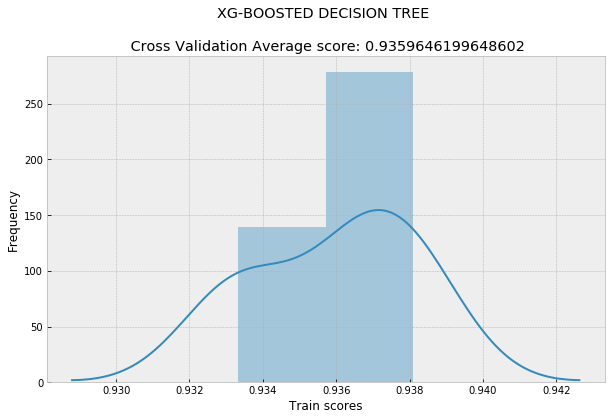

In [142]:
plt.figure(figsize=(10,6))
plt.xlabel('Train scores')
plt.ylabel('Frequency')
sns.distplot(cv_results_xgb_dt)
plt.title('XG-BOOSTED DECISION TREE \n\n Cross Validation Average score: {}'.format(np.mean(cv_results_xgb_dt)))
plt.show()

#### Making Predictions using cross validation

Train Data: Accuracy Score

0.9431747100996006


Train Data: Classification Report

              precision    recall  f1-score   support

        10.0       1.00      1.00      1.00      5938
        20.0       1.00      1.00      1.00      5938
        30.0       0.86      0.86      0.86      5938
        45.0       0.84      0.83      0.84      5938
        65.0       0.91      0.92      0.91      5938
        80.0       1.00      1.00      1.00      5938
       120.0       0.99      1.00      1.00      5938

    accuracy                           0.94     41566
   macro avg       0.94      0.94      0.94     41566
weighted avg       0.94      0.94      0.94     41566



Train Data: Kappa Cohen Score

0.933703828449534


Train Data: Confusion Matrix

[[5936    0    2    0    0    0    0]
 [   0 5929    6    2    1    0    0]
 [   1   10 5111  629  179    0    8]
 [   4    8  628 4914  375    0    9]
 [   2    7  184  272 5458    1   14]
 [   0    0    3    2    0 5933    0]
 [   0  

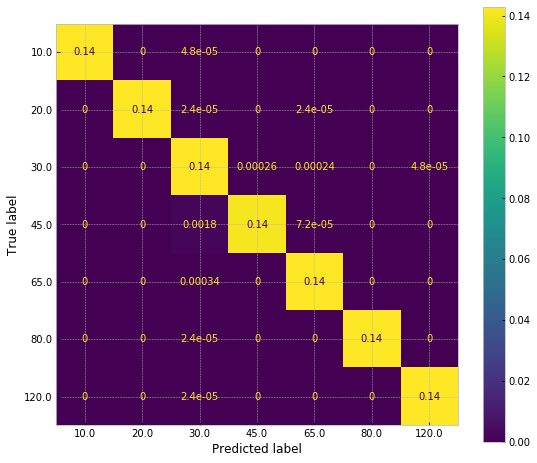

Test Data: Accuracy Score

0.6899504281207751


Test Data: Classification Report

              precision    recall  f1-score   support

        20.0       0.00      0.00      0.00         4
        30.0       0.78      0.86      0.82      1468
        45.0       0.48      0.44      0.46       554
        65.0       0.29      0.12      0.17       176
        80.0       0.00      0.00      0.00         3
       120.0       0.33      0.07      0.12        14

    accuracy                           0.69      2219
   macro avg       0.31      0.25      0.26      2219
weighted avg       0.66      0.69      0.67      2219



Test Data: Kappa Cohen Score

0.3173696765640267


Test Data: Confusion Matrix

[[   0    4    0    0    0    0]
 [   0 1264  182   21    0    1]
 [   0  280  244   30    0    0]
 [   0   75   78   22    0    1]
 [   0    1    1    1    0    0]
 [   0    5    5    3    0    1]]


Test Data: Normalized Confusion Matrix



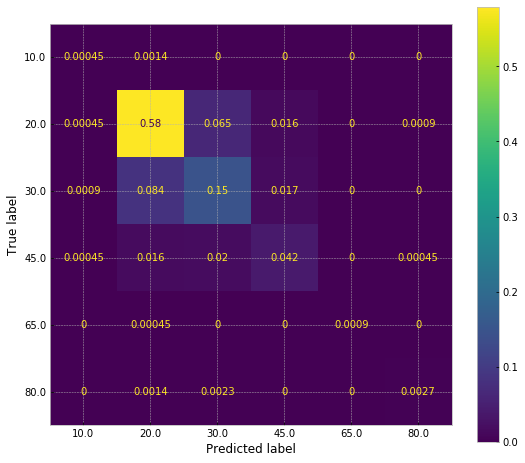

In [143]:
y_xgb_dt_pred_train, y_xgb_dt_pred_test = predict_cv(X_train_SMOTE, X_test, y_train_SMOTE, y_test, RS_best_est_xgb_dt)

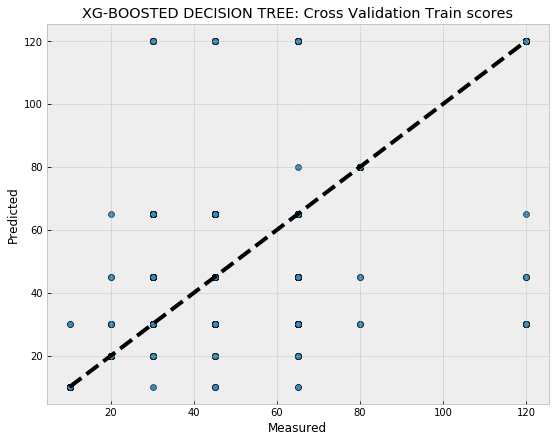

In [145]:
# xg-boosted Cross Validation Train scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_train_SMOTE, y_xgb_dt_pred_train, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('XG-BOOSTED DECISION TREE: Cross Validation Train scores')
plt.show()

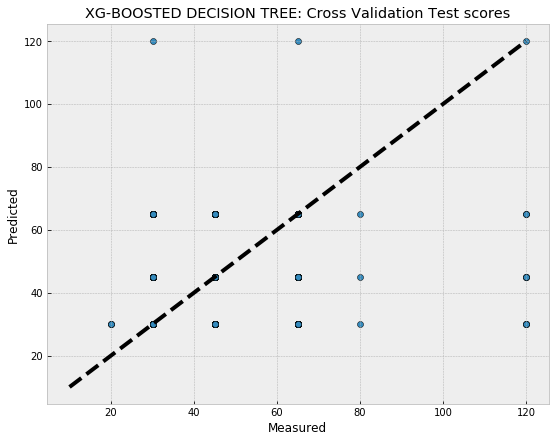

In [146]:
# xg-boosted Cross Validation Test scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_test, y_xgb_dt_pred_test, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('XG-BOOSTED DECISION TREE: Cross Validation Test scores')
plt.show()

In [ ]:
# We hence conclude that our Random Forest Hyper Tuned classifier prove to be most effective.